In [ ]:
import pandas as pd
import numpy as np
import os
import random
import scipy as sp
from sklearn.metrics import confusion_matrix

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, warnings, scipy

import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
airport = pd.read_csv('airports.csv')

In [ ]:
airport.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
airlines = pd.read_csv('airlines.csv')

In [ ]:
flights = pd.read_csv('flights.csv')

In [ ]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,ARRIVAL_DELAY_STATUS,DIVERTED,CANCELLED,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(flights.columns)

34

## Correlation Matrix

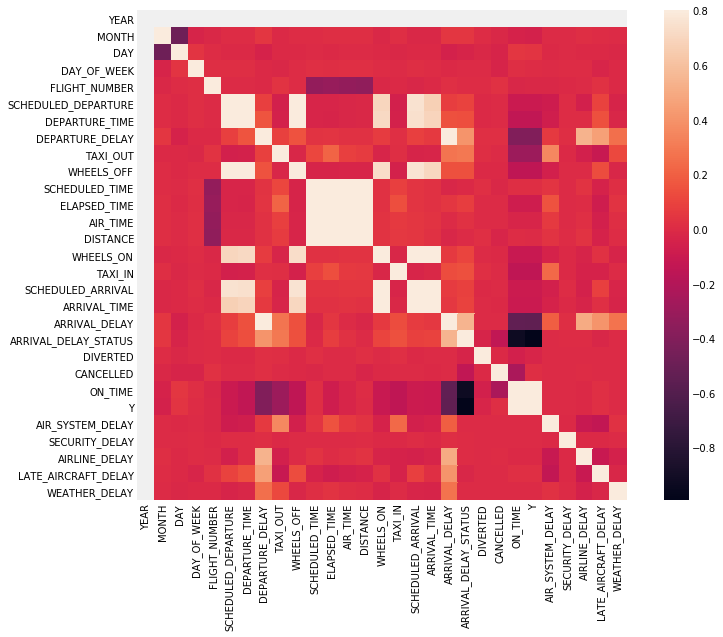

In [ ]:
#correlation matrix
corrmat = flights.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [ ]:
df = pd.read_csv('flights.csv', low_memory=False)
print('Dataframe dimensions:', df.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (1048575, 34)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,ARRIVAL_DELAY_STATUS,DIVERTED,CANCELLED,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
column type,int64,int64,int64,int64,object,int64,object,object,object,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,int64,int64,int64,int64,object,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,6798,0,0,0,33585,33585,34176,34176,2,36520,36520,0,34980,34980,0,34980,36520,0,0,0,0,0,1005647,795962,795962,795962,795962,795962
null values (%),0,0,0,0,0,0,0.648308,0,0,0,3.20292,3.20292,3.25928,3.25928,0.000190735,3.48282,3.48282,0,3.33596,3.33596,0,3.33596,3.48282,0,0,0,0,0,95.9061,75.9089,75.9089,75.9089,75.9089,75.9089


In [ ]:
df = df[df['MONTH'] == 1]

In [ ]:
## Cleaning the data

In [ ]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

In [ ]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [ ]:
df['SCHEDULED_DEPARTURE'] = create_flight_time(df, 'SCHEDULED_DEPARTURE')
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format_heure)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format_heure)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format_heure)
#__________________________________________________________________________
df.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01 00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


In [ ]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                       'MONTH','DAY','DAY_OF_WEEK','DATE', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
df.drop(variables_to_remove, axis = 1, inplace = True)
df = df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]
df[:5]

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,04:30:00,04:08:00,-22.0,205.0,194.0
1,AA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,07:50:00,07:41:00,-9.0,280.0,279.0
2,US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,08:06:00,08:11:00,5.0,286.0,293.0
3,AA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,08:05:00,07:56:00,-9.0,285.0,281.0
4,AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,03:20:00,02:59:00,-21.0,235.0,215.0


In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ARRIVAL_DELAY,3476,98.485588
1,ELAPSED_TIME,3476,98.485588
2,ARRIVAL_TIME,3381,98.526977
3,DEPARTURE_TIME,3314,98.556167
4,DEPARTURE_DELAY,3314,98.556167
5,AIRLINE,0,100.000000
6,ORIGIN_AIRPORT,0,100.000000
7,DESTINATION_AIRPORT,0,100.000000
8,SCHEDULED_DEPARTURE,0,100.000000
9,SCHEDULED_ARRIVAL,0,100.000000


In [ ]:
df.dropna(inplace = True)

# Delay Analysis
We shalll first do an analysis on airlines that are "delayed" and then on airlines which are "cancelled"

# Comapring the airlines

In [ ]:
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [ ]:
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['DEPARTURE_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
VX,-21.0,334.0,2245.0,5.537639
HA,-26.0,1003.0,3195.0,-0.954930
F9,-32.0,696.0,3268.0,11.675337
NK,-28.0,511.0,4344.0,5.433011
AS,-47.0,383.0,6488.0,2.080610
B6,-26.0,306.0,9999.0,6.122812
MQ,-28.0,605.0,14402.0,6.823080
US,-26.0,524.0,16012.0,2.665001
UA,-23.0,566.0,18002.0,7.231641


Now, in order to facilitate the lecture of that information, I construct some graphics:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


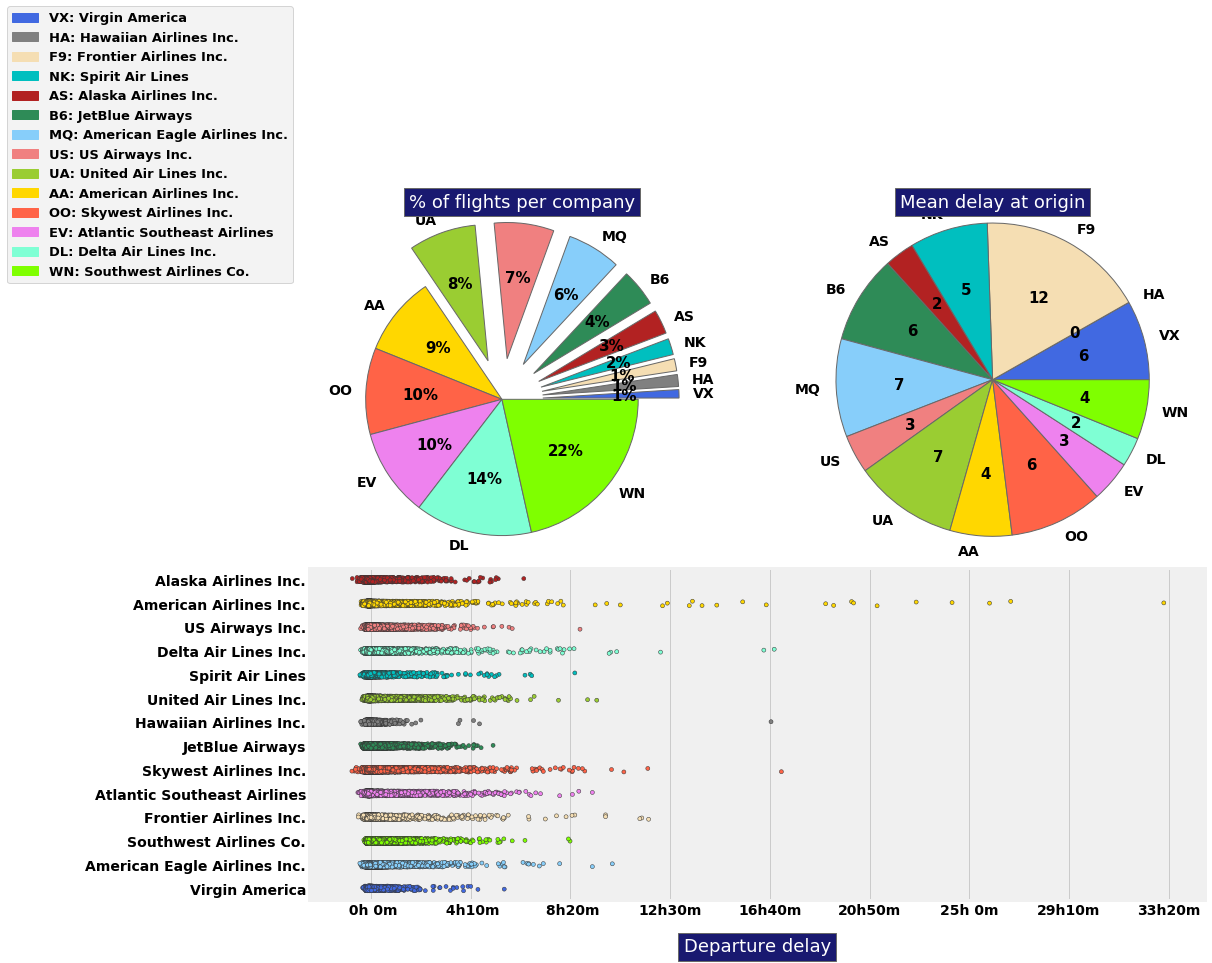

In [ ]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = df.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
df2['AIRLINE'] = df2['AIRLINE'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 

Considering the first pie chart that gives the percentage of flights per airline, we see that there is some disparity between the carriers. For exemple, Southwest Airlines accounts for  ∼ 20% of the flights which is similar to the number of flights chartered by the 7 tiniest airlines. However, if we have a look at the second pie chart, we see that here, on the contrary, the differences among airlines are less pronounced. Excluding Hawaiian Airlines and Alaska Airlines that report extremely low mean delays, we obtain that a value of  ∼ 11 ± 7 minutes would correctly represent all mean delays. Note that this value is quite low which mean that the standard for every airline is to respect the schedule !

Finally, the figure at the bottom makes a census of all the delays that were measured in January 2015. This representation gives a feeling on the dispersion of data and put in perspective the relative homogeneity that appeared in the second pie chart. Indeed, we see that while all mean delays are around 10 minutes, this low value is a consequence of the fact that a majority of flights take off on time. However, we see that occasionally, we can face really large delays that can reach a few tens of hours !

The large majority of short delays is visible in the next figure:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


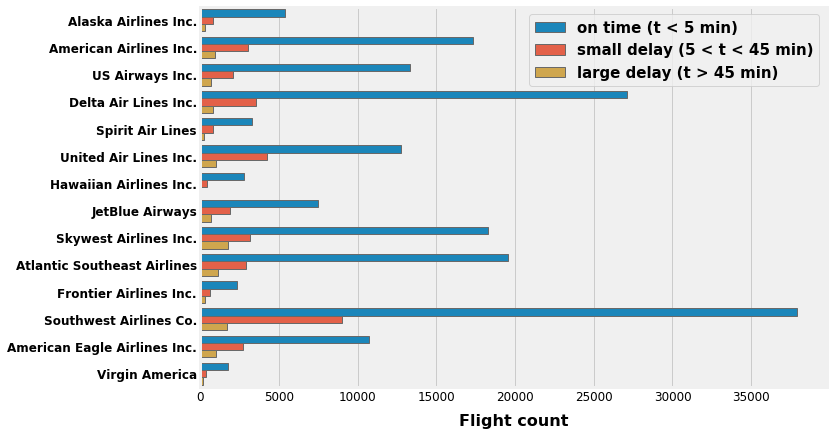

In [ ]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

This figure gives a count of the delays of less than 5 minutes, those in the range 5 < t < 45 min and finally, the delays greater than 45 minutes. Hence, we wee that independently of the airline, delays greater than 45 minutes only account for a few percents. However, the proportion of delays in these three groups depends on the airline: as an exemple, in the case of SkyWest Airlines, the delays greater than 45 minutes are only lower by  ∼ 30% with respect to delays in the range 5 < t < 45 min. Things are better for SoutWest Airlines since delays greater than 45 minutes are 4 times less frequent than delays in the range 5 < t < 45 min.

### Delay Distribution: establishing the rank of airlines

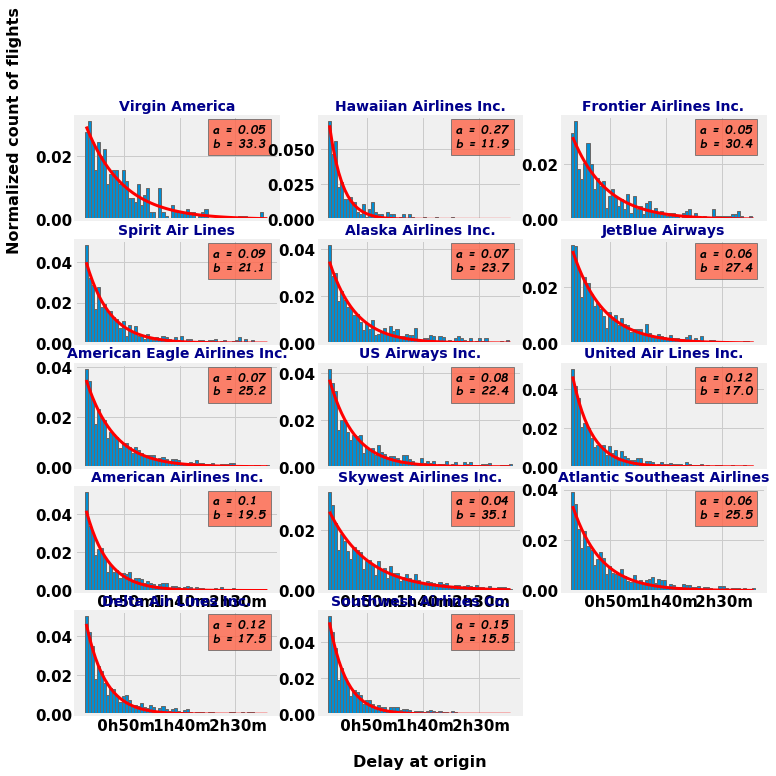

In [ ]:
#___________________________________________
# Model function used to fit the histograms
def func(x, a, b):
    return a * np.exp(-x/b)
#-------------------------------------------
points = [] ; label_company = []
fig = plt.figure(1, figsize=(11,11))
i = 0
for carrier_name in [abbr_companies[x] for x in global_stats.index]:
    i += 1
    ax = fig.add_subplot(5,3,i)    
    #_________________________
    # Fit of the distribution
    n, bins, patches = plt.hist(x = df2[df2['AIRLINE']==carrier_name]['DEPARTURE_DELAY'],
                                range = (15,180), normed=True, bins= 60)
    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])    
    popt, pcov = curve_fit(func, bin_centers, n, p0 = [1, 2])
    #___________________________
    # bookeeping of the results
    points.append(popt)
    label_company.append(carrier_name)
    #______________________
    # draw the fit curve
    plt.plot(bin_centers, func(bin_centers, *popt), 'r-', linewidth=3)    
    #_____________________________________
    # define tick labels for each subplot
    if i < 10:
        ax.set_xticklabels(['' for x in ax.get_xticks()])
    else:
        ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                            for x in ax.get_xticks()])
    #______________
    # subplot title
    plt.title(carrier_name, fontsize = 14, fontweight = 'bold', color = 'darkblue')
    #____________
    # axes labels 
    if i == 4:
        ax.text(-0.3,0.9,'Normalized count of flights', fontsize=16, rotation=90,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    if i == 14:
        ax.text( 0.5, -0.5 ,'Delay at origin', fontsize=16, rotation=0,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    #___________________________________________
    # Legend: values of the a and b coefficients
    ax.text(0.68, 0.7, 'a = {}\nb = {}'.format(round(popt[0],2), round(popt[1],1)),
            style='italic', transform=ax.transAxes, fontsize = 12, family='fantasy',
            bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})
    
plt.tight_layout()

This figure shows the normalised distribution of delays that I modelised with an exponential distribution  𝑓(𝑥)=𝑎exp(−𝑥/𝑏) . The  𝑎  et  𝑏  parameters obtained to describe each airline are given in the upper right corner of each panel. Note that the normalisation of the distribution implies that  ∫𝑓(𝑥)𝑑𝑥∼1 . Here, we do not have a strict equality since the normalisation applies the histograms but not to the model function. However, this relation entails that the  𝑎  et  𝑏 coefficients will be correlated with  𝑎∝1/𝑏  and hence, only one of these two values is necessary to describe the distributions. Finally, according to the value of either  𝑎  or  𝑏 , it is possible to establish a ranking of the companies: the low values of  𝑎  will correspond to airlines with a large proportion of important delays and, on the contrary, airlines that shine from their punctuality will admit hight  𝑎  values:

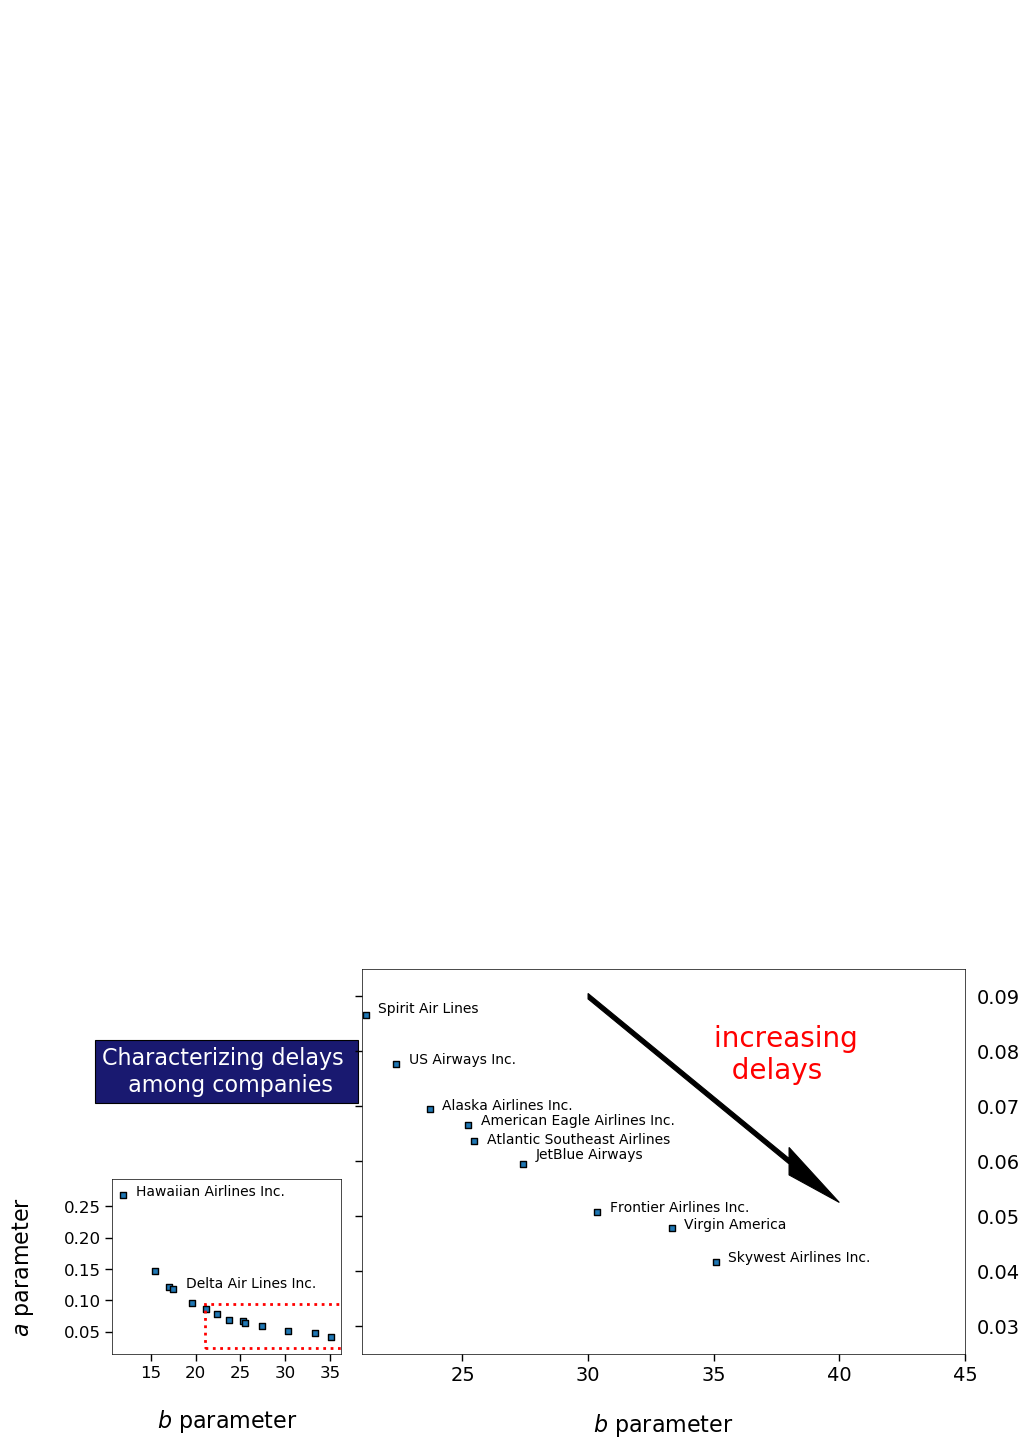

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_context('paper')
import matplotlib.patches as patches

fig = plt.figure(1, figsize=(11,5))
y_shift = [0 for _ in range(14)]
y_shift[3] = 0.5/1000
y_shift[12] = 2.5/1000
y_shift[11] = -0.5/1000
y_shift[8] = -2.5/1000
y_shift[5] = 1/1000
x_val = [s[1] for s in points]
y_val = [s[0] for s in points]

gs=GridSpec(2,7)
#_______________________________
# 1/ Plot overview (left panel)
ax1=fig.add_subplot(gs[1,0:2]) 
plt.scatter(x=x_val, y=y_val, marker = 's', edgecolor='black', linewidth = '1')
#__________________________________
# Company label: Hawaiian airlines
i= 1
ax1.annotate(label_company[i], xy=(x_val[i]+1.5, y_val[i]+y_shift[i]),
             xycoords='data', fontsize = 10)
plt.xlabel("$b$ parameter", fontsize=16, labelpad=20)
plt.ylabel("$a$ parameter", fontsize=16, labelpad=20)
#__________________________________
# Company label: Hawaiian airlines
i= 12
ax1.annotate(label_company[i], xy=(x_val[i]+1.5, y_val[i]+y_shift[i]),
             xycoords='data', fontsize = 10)
plt.xlabel("$b$ parameter", fontsize=16, labelpad=20)
plt.ylabel("$a$ parameter", fontsize=16, labelpad=20)
#____________
# Main Title
ax1.text(.5,1.5,'Characterizing delays \n among companies', fontsize=16,
        bbox={'facecolor':'midnightblue', 'pad':5}, color='w',
        horizontalalignment='center',
        transform=ax1.transAxes)
#________________________
# plot border parameters
for k in ['top', 'bottom', 'right', 'left']:
    ax1.spines[k].set_visible(True)
    ax1.spines[k].set_linewidth(0.5)
    ax1.spines[k].set_color('k')
#____________________
# Create a Rectangle 
rect = patches.Rectangle((21,0.025), 19, 0.07, linewidth=2,
                         edgecolor='r', linestyle=':', facecolor='none')
ax1.add_patch(rect)
#_______________________________________________
# 2/ Zoom on the bulk of carriers (right panel)
ax2=fig.add_subplot(gs[0:2,2:])
plt.scatter(x=x_val, y=y_val, marker = 's', edgecolor='black', linewidth = '1')
plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax1.get_yticklabels(), fontsize=12)
ax2.set_xlim(21,45)
ax2.set_ylim(0.025,0.095)
#________________
# Company labels
for i in range(len(abbr_companies)):
    ax2.annotate(label_company[i], xy=(x_val[i]+0.5, y_val[i]+y_shift[i]),
                 xycoords='data', fontsize = 10)
#____________________________
# Increasing delay direction
ax2.arrow(30, 0.09, 8, -0.03, head_width=0.005,
          shape = 'full', head_length=2, fc='k', ec='k')
ax2.annotate('increasing \n  delays', fontsize= 20, color = 'r',
          xy=(35, 0.075), xycoords='data')
#________________________________
# position and size of the ticks
plt.tick_params(labelleft=False, labelright=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
#________________________
# plot border parameters
for k in ['top', 'bottom', 'right', 'left']:
    ax2.spines[k].set_visible(True)
    ax2.spines[k].set_linewidth(0.5)
    ax2.spines[k].set_color('k')    
#________________________________
# Connection between the 2 plots
xy2 = (40, 0.09) ; xy1 = (21, 0.095)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1,
                      linestyle=':', linewidth = 2, color="red")
ax2.add_artist(con)
xy2 = (40, 0.025) ; xy1 = (21, 0.025)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1,
                      linestyle=':', linewidth = 2, color="red")
ax2.add_artist(con)
plt.xlabel("$b$ parameter", fontsize=16, labelpad=20)
#--------------------------------
plt.show()

The left panel of this figure gives an overview of the  𝑎  and  𝑏  coefficients of the 14 airlines showing that Hawaiian Airlines and Delta Airlines occupy the first two places. The right panel zooms on 12 other airlines. We can see that SouthWest Airlines, which represent  ∼ 20% of the total number of flights is well ranked and occupy the third position. According to this ranking, SkyWest Airlines is the worst carrier.

___
## Delays in take-off or landing ?
In the previous section, all the discussion was done on departure delays. However, these delays differ somewhat from the delays recorded at arrival:

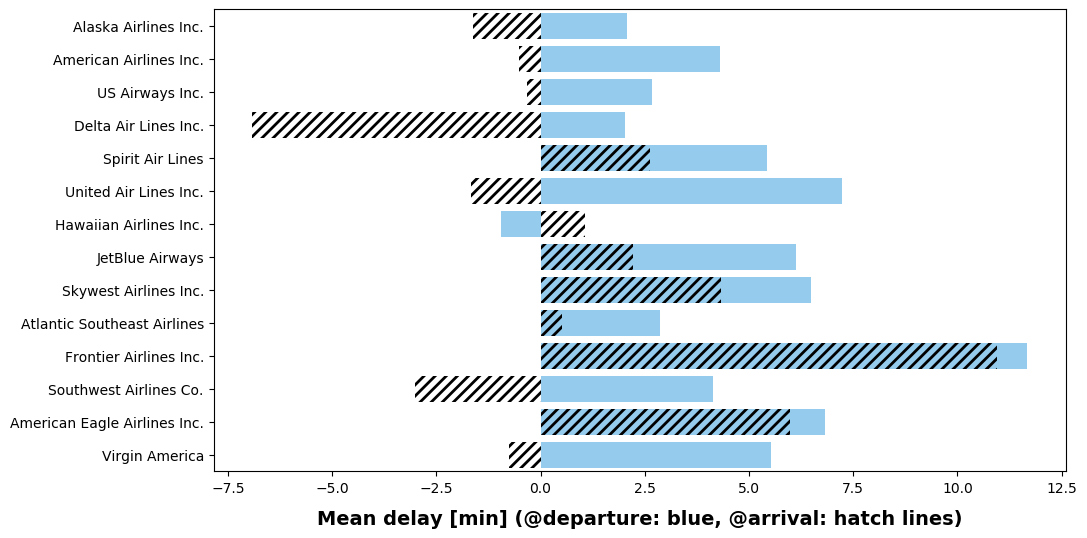

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=df, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);

On this figure, we can see that delays at arrival are generally lower than at departure. This indicates that airlines adjust their flight speed in order to reduce the delays at arrival. In what follows, I will just consider the delays at departure but one has to keep in mind that this can differ from arrival delays.

## Relation between the origin airport and delays

In [ ]:
print("Nb of airports: {}".format(len(df['ORIGIN_AIRPORT'].unique())))

Nb of airports: 312


In [ ]:
origin_nb = dict()
for carrier in abbr_companies.keys():
    liste_origin_airport = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    origin_nb[carrier] = len(liste_origin_airport)

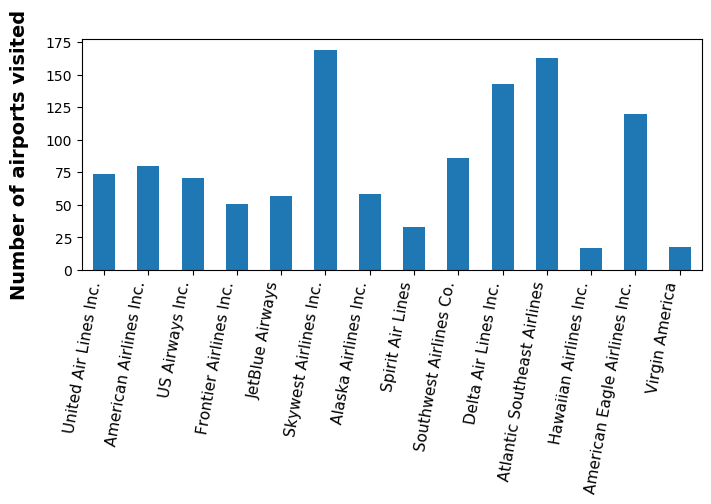

In [ ]:
test_df = pd.DataFrame.from_dict(origin_nb, orient='index')
test_df.rename(columns = {0:'count'}, inplace = True)
ax = test_df.plot(kind='bar', figsize = (8,3))
labels = [abbr_companies[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.ylabel('Number of airports visited', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 80)
ax.legend().set_visible(False)
plt.show()

In [ ]:
temp = pd.read_csv('airports.csv')
identify_airport = temp.set_index('IATA_CODE')['CITY'].to_dict()
latitude_airport = temp.set_index('IATA_CODE')['LATITUDE'].to_dict()
longitude_airport = temp.set_index('IATA_CODE')['LONGITUDE'].to_dict()

In [ ]:
def make_map(df, carrier, long_min, long_max, lat_min, lat_max):
    fig=plt.figure(figsize=(7,3))
    ax=fig.add_axes([0.,0.,1.,1.])
    m = Basemap(resolution='i',llcrnrlon=long_min, urcrnrlon=long_max,
                  llcrnrlat=lat_min, urcrnrlat=lat_max, lat_0=0, lon_0=0,)
    df2 = df[df['AIRLINE'] == carrier]
    count_trajectories = df2.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).size()
    count_trajectories.sort_values(inplace = True)
    
    for (origin, dest), s in count_trajectories.iteritems():
        nylat,   nylon = latitude_airport[origin], longitude_airport[origin]
        m.plot(nylon, nylat, marker='o', markersize = 10, markeredgewidth = 1,
                   color = 'seagreen', markeredgecolor='k')

    for (origin, dest), s in count_trajectories.iteritems():
        nylat,   nylon = latitude_airport[origin], longitude_airport[origin]
        lonlat, lonlon = latitude_airport[dest], longitude_airport[dest]
        if pd.isnull(nylat) or pd.isnull(nylon) or \
                pd.isnull(lonlat) or pd.isnull(lonlon): continue
        if s < 100:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=0.5, color='b',
                             label = '< 100')
        elif s < 200:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=2, color='r',
                             label = '100 <.< 200')
        else:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=2, color='gold',
                              label = '> 200')    
    #_____________________________________________
    # remove duplicate labels and set their order
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    key_order = ('< 100', '100 <.< 200', '> 200')                
    new_label = OrderedDict()
    for key in key_order:
        if key not in by_label.keys(): continue
        new_label[key] = by_label[key]
    plt.legend(new_label.values(), new_label.keys(), loc = 'best', prop= {'size':8},
               title='flights per month', facecolor = 'palegreen', 
               shadow = True, frameon = True, framealpha = 1)    
    m.drawcoastlines()
    m.fillcontinents()
    ax.set_title('{} flights'.format(abbr_companies[carrier]))

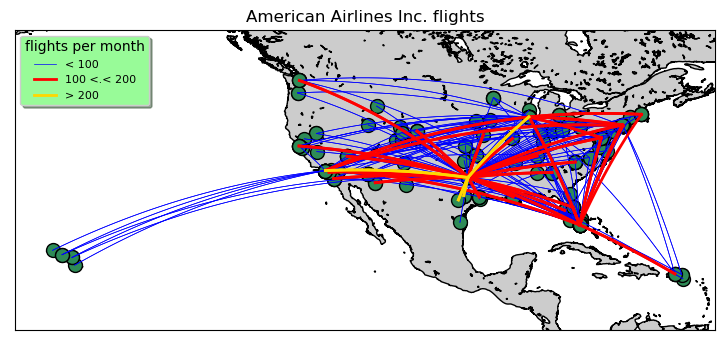

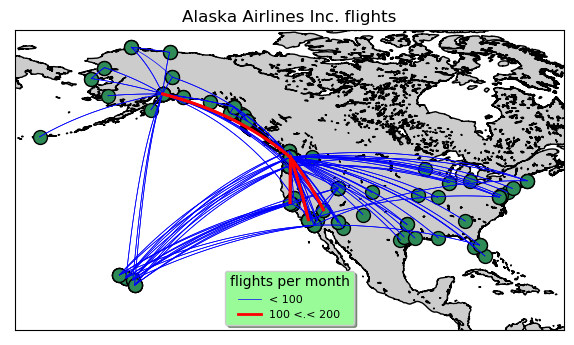

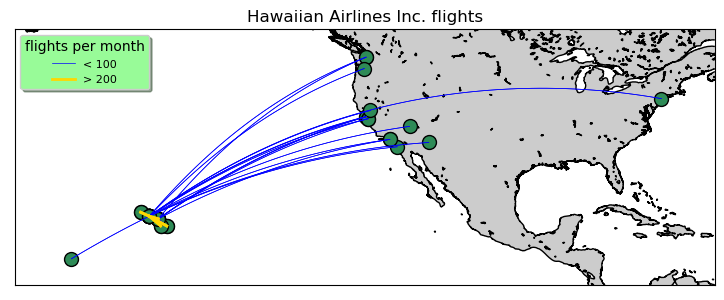

In [ ]:
coord = dict()
coord['AA'] = [-165, -60, 10, 55]
coord['AS'] = [-182, -63, 10, 75]
coord['HA'] = [-180, -65, 10, 52]
for carrier in ['AA', 'AS', 'HA']: 
    make_map(df, carrier, *coord[carrier])

___
### How the origin airport impact delays


In [ ]:
airport_mean_delays = pd.DataFrame(pd.Series(df['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    df1 = df[df['AIRLINE'] == carrier]
    test = df1['DEPARTURE_DELAY'].groupby(df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

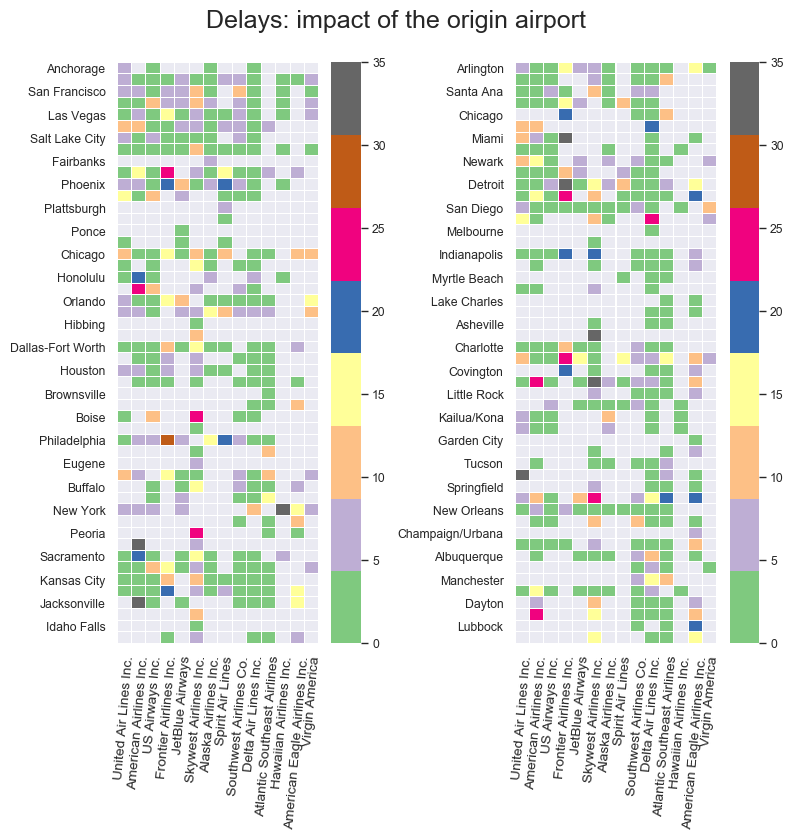

In [ ]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()

This figure allows to draw some conclusions. First, by looking at the data associated with the different airlines, we find the behavior we previously observed: for example, if we consider the right panel, it will be seen that the column associated with American Eagle Airlines mostly reports large delays, while the column associated with Delta Airlines is mainly associated with delays of less than 5 minutes. If we now look at the airports of origin, we will see that some airports favor late departures: see e.g. Denver, Chicago or New York. Conversely, other airports will mainly know on time departures such as Portland or Oakland.

Finally, we can deduce from these observations that there is a high variability in average delays, both between the different airports but also between the different airlines. This is important because it implies that in order to accurately model the delays, it will be necessary to adopt a model that is ** specific to the company and the home airport **.

### Flights with usual delay

In [ ]:
#_________________________________________________________________
# We select the company and create a subset of the main dataframe
carrier = 'AA'
df1 = df[df['AIRLINE']==carrier][['ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY']]
#___________________________________________________________
# I collect the routes and list the delays for each of them
trajet = dict()
for ind, col in df1.iterrows():
    if pd.isnull(col['DEPARTURE_DELAY']): continue
    route = str(col['ORIGIN_AIRPORT'])+'-'+str(col['DESTINATION_AIRPORT'])
    if route in trajet.keys():
        trajet[route].append(col['DEPARTURE_DELAY'])
    else:
        trajet[route] = [col['DEPARTURE_DELAY']]
#____________________________________________________________________        
# I transpose the dictionary in a list to sort the routes by origins        
liste_trajet = []
for key, value in trajet.items():
    liste_trajet.append([key, value])
liste_trajet.sort()

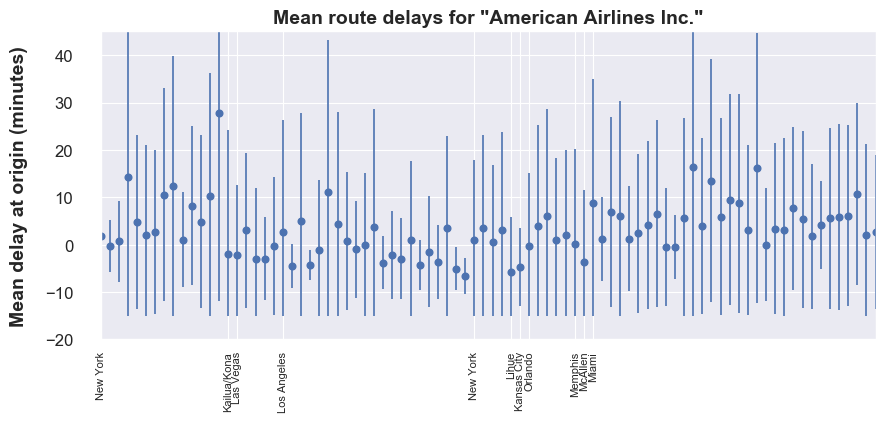

In [ ]:
mean_val = [] ; std_val = [] ; x_label = []

i = 0
for route, liste_retards in liste_trajet:
    #_____________________________________________
    # I set the labels as the airport from origin
    index = route.split('-')[0]
    x_label.append(identify_airport[index])
    #______________________________________________________________________________
    # I put a threshold on delays to prevent that high values take too much weight
    trajet2 = [min(90, s) for s in liste_retards]
    #________________________________________
    # I compute mean and standard deviations
    mean_val.append(scipy.mean(trajet2))
    std_val.append(scipy.std(trajet2))
    i += 1
#________________
# Plot the graph
fig, ax = plt.subplots(figsize=(10,4))
std_min = [ min(15 + mean_val[i], s) for i,s in enumerate(std_val)] 
ax.errorbar(list(range(i)), mean_val, yerr = [std_min, std_val], fmt='o') 
ax.set_title('Mean route delays for "{}"'.format(abbr_companies[carrier]),
             fontsize=14, weight = 'bold')
plt.ylabel('Mean delay at origin (minutes)', fontsize=14, weight = 'bold', labelpad=12)
#___________________________________________________
# I define the x,y range and positions of the ticks
imin, imax = 145, 230
plt.xlim(imin, imax) ; plt.ylim(-20, 45)
liste_ticks = [imin]
for j in range(imin+1,imax):
    if x_label[j] == x_label[j-1]: continue
    liste_ticks.append(j)
#_____________________________
# and set the tick parameters  
ax.set_xticks(liste_ticks)
ax.set_xticklabels([x_label[int(x)] for x in ax.get_xticks()], rotation = 90, fontsize = 8)
plt.setp(ax.get_yticklabels(), fontsize=12, rotation = 0)
ax.tick_params(axis='y', which='major', pad=15)

plt.show()

This figure gives the average delays for American Airlines, according to the city of origin and the destination (note that on the abscissa axis, only the origin is indicated for the sake of clarity). The error bars associated with the different paths correspond to the standard deviations. In this example, it can be seen that for a given airport of origin, delays will fluctuate depending on the destination. We see, for example, that here the greatest variations are obtained for New York or Miami where the initial average delays vary between 0 and  ∼ 20 minutes.

### Temporal variability of delays

In [ ]:
class Figure_style():
    #_________________________________________________________________
    def __init__(self, size_x = 11, size_y = 5, nrows = 1, ncols = 1):
        sns.set_style("white")
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
        self.fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(size_x,size_y,))
        #________________________________
        # convert self.axs to 2D array
        if nrows == 1 and ncols == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif nrows == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif ncols == 1:
            self.axs = np.reshape(axs, (-1, 1))
    #_____________________________
    def pos_update(self, ix, iy):
        self.ix, self.iy = ix, iy
    #_______________
    def style(self):
        self.axs[self.ix, self.iy].spines['right'].set_visible(False)
        self.axs[self.ix, self.iy].spines['top'].set_visible(False)
        self.axs[self.ix, self.iy].yaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].xaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].tick_params(axis='both', which='major',
                                               labelsize=10, size = 5)
    #________________________________________
    def draw_legend(self, location='upper right'):
        legend = self.axs[self.ix, self.iy].legend(loc = location, shadow=True,
                                        facecolor = 'g', frameon = True)
        legend.get_frame().set_facecolor('whitesmoke')
    #_________________________________________________________________________________
    def cust_plot(self, x, y, color='b', linestyle='-', linewidth=1, marker=None, label=''):
        if marker:
            markerfacecolor, marker, markersize = marker[:]
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                linewidth = linewidth, marker = marker, label = label,
                                markerfacecolor = markerfacecolor, markersize = markersize)
        else:
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                        linewidth = linewidth, label=label)
        self.fig.autofmt_xdate()
    #________________________________________________________________________
    def cust_plot_date(self, x, y, color='lightblue', linestyle='-',
                       linewidth=1, markeredge=False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].plot_date(x, y, color='lightblue', markeredgecolor='grey',
                                  markeredgewidth = markeredgewidth, label=label)
    #________________________________________________________________________
    def cust_scatter(self, x, y, color = 'lightblue', markeredge = False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].scatter(x, y, color=color,  edgecolor='grey',
                                  linewidths = markeredgewidth, label=label)    
    #___________________________________________
    def set_xlabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_xlabel(label, fontsize = fontsize)
    #___________________________________________
    def set_ylabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_ylabel(label, fontsize = fontsize)
    #____________________________________
    def set_xlim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_xlim([lim_inf, lim_sup])
    #____________________________________
    def set_ylim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_ylim([lim_inf, lim_sup])           

In [ ]:
carrier = 'WN'
id_airport = 4
liste_origin_airport = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
df2 = df[(df['AIRLINE'] == carrier) & (df['ARRIVAL_DELAY'] > 0)
         & (df['ORIGIN_AIRPORT'] == liste_origin_airport[id_airport])]
df2.sort_values('SCHEDULED_DEPARTURE', inplace = True)

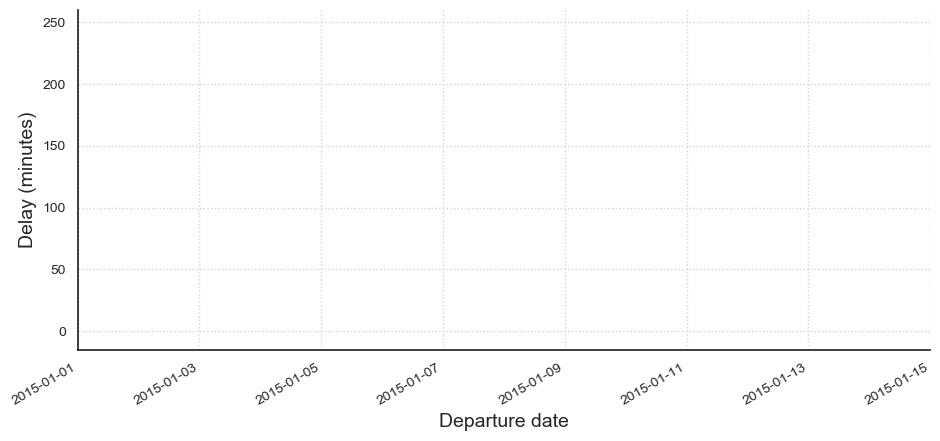

In [ ]:
fig1 = Figure_style(11, 5, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot(df2['SCHEDULED_DEPARTURE'], df2['DEPARTURE_DELAY'], linestyle='-')
fig1.style() 
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure date', fontsize = 14)
date_1 = datetime.datetime(2015,1,1)
date_2 = datetime.datetime(2015,1,15)
fig1.set_xlim(date_1, date_2)
fig1.set_ylim(-15, 260)

In [ ]:
#_______________________________
def func2(x, a, b, c):
    return a * x**2 +  b*x + c
#_______________________________
df2['heure_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
test2 = df2['DEPARTURE_DELAY'].groupby(df2['heure_depart']).apply(get_stats).unstack()
fct = lambda x:x.hour*3600+x.minute*60+x.second
x_val = np.array([fct(s) for s in test2.index]) 
y_val = test2['mean']
popt, pcov = curve_fit(func2, x_val, y_val, p0 = [1, 2, 3])
test2['fit'] = pd.Series(func2(x_val, *popt), index = test2.index)

ConversionError: Failed to convert value(s) to axis units: array([datetime.time(14, 20), datetime.time(14, 25),
       datetime.time(15, 15), datetime.time(15, 20),
       datetime.time(15, 20), datetime.time(15, 30),
       datetime.time(15, 45), datetime.time(16, 0), datetime.time(16, 0),
       datetime.time(16, 55), datetime.time(16, 55), datetime.time(17, 5),
       datetime.time(17, 15), datetime.time(17, 20),
       datetime.time(17, 35), datetime.time(17, 55),
       datetime.time(18, 25), datetime.time(18, 25),
       datetime.time(18, 30), datetime.time(18, 50), datetime.time(19, 5),
       datetime.time(19, 10), datetime.time(19, 10),
       datetime.time(19, 20), datetime.time(19, 20),
       datetime.time(19, 25), datetime.time(19, 30),
       datetime.time(19, 45), datetime.time(19, 55),
       datetime.time(20, 20), datetime.time(21, 5), datetime.time(21, 5),
       datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 20), datetime.time(21, 40), datetime.time(9, 25),
       datetime.time(9, 25), datetime.time(9, 40), datetime.time(9, 55),
       datetime.time(10, 25), datetime.time(11, 45),
       datetime.time(12, 25), datetime.time(13, 15),
       datetime.time(13, 20), datetime.time(13, 20),
       datetime.time(13, 20), datetime.time(13, 25),
       datetime.time(13, 25), datetime.time(13, 30),
       datetime.time(13, 45), datetime.time(14, 55),
       datetime.time(14, 55), datetime.time(15, 45),
       datetime.time(17, 30), datetime.time(17, 55), datetime.time(18, 5),
       datetime.time(18, 25), datetime.time(18, 30),
       datetime.time(18, 30), datetime.time(18, 40),
       datetime.time(19, 55), datetime.time(20, 15),
       datetime.time(20, 20), datetime.time(20, 25), datetime.time(9, 0),
       datetime.time(12, 35), datetime.time(12, 45),
       datetime.time(13, 25), datetime.time(13, 30),
       datetime.time(13, 30), datetime.time(13, 30),
       datetime.time(13, 45), datetime.time(13, 55),
       datetime.time(14, 10), datetime.time(14, 15),
       datetime.time(14, 20), datetime.time(14, 25),
       datetime.time(14, 55), datetime.time(15, 15),
       datetime.time(15, 20), datetime.time(15, 45), datetime.time(16, 0),
       datetime.time(16, 0), datetime.time(16, 35), datetime.time(16, 40),
       datetime.time(17, 45), datetime.time(17, 55),
       datetime.time(18, 15), datetime.time(19, 10),
       datetime.time(19, 25), datetime.time(19, 45),
       datetime.time(19, 55), datetime.time(20, 45), datetime.time(21, 5),
       datetime.time(21, 5), datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 10), datetime.time(21, 20),
       datetime.time(21, 30), datetime.time(21, 40), datetime.time(6, 10),
       datetime.time(6, 10), datetime.time(6, 20), datetime.time(7, 0),
       datetime.time(7, 0), datetime.time(8, 10), datetime.time(8, 35),
       datetime.time(8, 40), datetime.time(8, 45), datetime.time(8, 45),
       datetime.time(8, 45), datetime.time(8, 50), datetime.time(8, 50),
       datetime.time(8, 55), datetime.time(9, 0), datetime.time(9, 35),
       datetime.time(9, 55), datetime.time(10, 0), datetime.time(10, 10),
       datetime.time(10, 50), datetime.time(11, 0), datetime.time(11, 55),
       datetime.time(12, 35), datetime.time(13, 25),
       datetime.time(13, 30), datetime.time(13, 35),
       datetime.time(13, 35), datetime.time(15, 15),
       datetime.time(15, 20), datetime.time(15, 55),
       datetime.time(16, 55), datetime.time(17, 15),
       datetime.time(17, 20), datetime.time(17, 55), datetime.time(18, 0),
       datetime.time(18, 25), datetime.time(18, 50), datetime.time(19, 5),
       datetime.time(19, 5), datetime.time(19, 10), datetime.time(19, 10),
       datetime.time(19, 15), datetime.time(19, 20),
       datetime.time(19, 20), datetime.time(19, 20),
       datetime.time(19, 25), datetime.time(19, 30),
       datetime.time(19, 35), datetime.time(19, 45),
       datetime.time(19, 55), datetime.time(20, 20),
       datetime.time(21, 10), datetime.time(21, 15),
       datetime.time(21, 20), datetime.time(21, 25),
       datetime.time(21, 40), datetime.time(21, 40),
       datetime.time(21, 45), datetime.time(7, 0), datetime.time(7, 0),
       datetime.time(8, 0), datetime.time(8, 5), datetime.time(8, 35),
       datetime.time(8, 45), datetime.time(8, 45), datetime.time(8, 50),
       datetime.time(8, 50), datetime.time(8, 55), datetime.time(9, 55),
       datetime.time(10, 0), datetime.time(11, 15), datetime.time(12, 0),
       datetime.time(12, 35), datetime.time(13, 20),
       datetime.time(13, 20), datetime.time(13, 25),
       datetime.time(13, 30), datetime.time(13, 35),
       datetime.time(13, 45), datetime.time(14, 30),
       datetime.time(14, 40), datetime.time(15, 15),
       datetime.time(15, 40), datetime.time(15, 55), datetime.time(16, 0),
       datetime.time(16, 0), datetime.time(16, 5), datetime.time(17, 5),
       datetime.time(17, 45), datetime.time(18, 0), datetime.time(18, 25),
       datetime.time(18, 35), datetime.time(19, 5), datetime.time(19, 10),
       datetime.time(19, 15), datetime.time(19, 20),
       datetime.time(19, 25), datetime.time(19, 25),
       datetime.time(19, 30), datetime.time(19, 40),
       datetime.time(19, 55), datetime.time(19, 55),
       datetime.time(20, 20), datetime.time(21, 5), datetime.time(21, 5),
       datetime.time(21, 5), datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 10), datetime.time(21, 15),
       datetime.time(21, 15), datetime.time(21, 20),
       datetime.time(21, 20), datetime.time(21, 20),
       datetime.time(21, 25), datetime.time(21, 30),
       datetime.time(21, 40), datetime.time(21, 40),
       datetime.time(21, 40), datetime.time(21, 45), datetime.time(22, 0),
       datetime.time(6, 0), datetime.time(6, 10), datetime.time(6, 15),
       datetime.time(6, 20), datetime.time(6, 20), datetime.time(7, 35),
       datetime.time(7, 45), datetime.time(8, 5), datetime.time(8, 40),
       datetime.time(8, 45), datetime.time(8, 50), datetime.time(8, 55),
       datetime.time(9, 0), datetime.time(9, 0), datetime.time(9, 45),
       datetime.time(9, 50), datetime.time(10, 0), datetime.time(10, 15),
       datetime.time(10, 20), datetime.time(10, 50),
       datetime.time(11, 15), datetime.time(11, 30), datetime.time(12, 0),
       datetime.time(13, 20), datetime.time(13, 20),
       datetime.time(13, 25), datetime.time(13, 30),
       datetime.time(13, 30), datetime.time(13, 35),
       datetime.time(13, 35), datetime.time(13, 40),
       datetime.time(13, 45), datetime.time(13, 45),
       datetime.time(13, 55), datetime.time(14, 45),
       datetime.time(15, 20), datetime.time(15, 55), datetime.time(16, 5),
       datetime.time(16, 35), datetime.time(16, 55),
       datetime.time(17, 45), datetime.time(17, 55),
       datetime.time(18, 15), datetime.time(18, 25),
       datetime.time(18, 25), datetime.time(19, 5), datetime.time(19, 10),
       datetime.time(19, 20), datetime.time(19, 20),
       datetime.time(19, 45), datetime.time(20, 0), datetime.time(21, 10),
       datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 15), datetime.time(5, 55), datetime.time(7, 0),
       datetime.time(7, 0), datetime.time(8, 10), datetime.time(8, 55),
       datetime.time(9, 0), datetime.time(9, 5), datetime.time(9, 15),
       datetime.time(9, 35), datetime.time(10, 0), datetime.time(10, 5),
       datetime.time(11, 55), datetime.time(13, 5), datetime.time(13, 20),
       datetime.time(13, 20), datetime.time(13, 25),
       datetime.time(13, 25), datetime.time(13, 30),
       datetime.time(13, 35), datetime.time(13, 40),
       datetime.time(13, 55), datetime.time(15, 15),
       datetime.time(15, 20), datetime.time(15, 20),
       datetime.time(15, 30), datetime.time(15, 45),
       datetime.time(15, 55), datetime.time(16, 0), datetime.time(16, 0),
       datetime.time(16, 5), datetime.time(16, 30), datetime.time(16, 35),
       datetime.time(16, 55), datetime.time(16, 55), datetime.time(17, 0),
       datetime.time(17, 5), datetime.time(17, 15), datetime.time(17, 55),
       datetime.time(18, 25), datetime.time(18, 25),
       datetime.time(18, 50), datetime.time(19, 5), datetime.time(19, 20),
       datetime.time(19, 25), datetime.time(19, 55),
       datetime.time(19, 55), datetime.time(20, 35), datetime.time(21, 5),
       datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 15), datetime.time(21, 20),
       datetime.time(21, 40), datetime.time(21, 40),
       datetime.time(21, 45), datetime.time(22, 0), datetime.time(6, 5),
       datetime.time(6, 20), datetime.time(7, 35), datetime.time(7, 50),
       datetime.time(8, 10), datetime.time(8, 35), datetime.time(8, 55),
       datetime.time(9, 0), datetime.time(9, 0), datetime.time(9, 5),
       datetime.time(9, 50), datetime.time(9, 55), datetime.time(10, 0),
       datetime.time(10, 0), datetime.time(10, 5), datetime.time(10, 10),
       datetime.time(10, 20), datetime.time(11, 35),
       datetime.time(11, 55), datetime.time(12, 30),
       datetime.time(12, 35), datetime.time(12, 50),
       datetime.time(12, 50), datetime.time(13, 20),
       datetime.time(13, 25), datetime.time(13, 25),
       datetime.time(13, 30), datetime.time(13, 30),
       datetime.time(13, 30), datetime.time(13, 35),
       datetime.time(13, 40), datetime.time(13, 55),
       datetime.time(14, 15), datetime.time(14, 45),
       datetime.time(15, 20), datetime.time(15, 30),
       datetime.time(15, 45), datetime.time(15, 55), datetime.time(16, 0),
       datetime.time(16, 0), datetime.time(16, 5), datetime.time(16, 35),
       datetime.time(16, 55), datetime.time(16, 55), datetime.time(17, 5),
       datetime.time(17, 30), datetime.time(18, 25),
       datetime.time(18, 25), datetime.time(18, 50),
       datetime.time(18, 50), datetime.time(18, 50), datetime.time(19, 0),
       datetime.time(19, 30), datetime.time(19, 35),
       datetime.time(19, 55), datetime.time(20, 0), datetime.time(21, 10),
       datetime.time(21, 10), datetime.time(21, 15),
       datetime.time(21, 20), datetime.time(21, 20),
       datetime.time(21, 40), datetime.time(21, 40), datetime.time(6, 50),
       datetime.time(9, 0), datetime.time(9, 25), datetime.time(10, 40),
       datetime.time(12, 25), datetime.time(12, 55),
       datetime.time(13, 10), datetime.time(13, 15),
       datetime.time(13, 20), datetime.time(13, 20),
       datetime.time(13, 20), datetime.time(13, 25),
       datetime.time(13, 25), datetime.time(13, 30),
       datetime.time(13, 30), datetime.time(13, 30),
       datetime.time(13, 35), datetime.time(13, 40), datetime.time(14, 0),
       datetime.time(14, 25), datetime.time(15, 45),
       datetime.time(15, 50), datetime.time(16, 25),
       datetime.time(16, 55), datetime.time(17, 0), datetime.time(17, 40),
       datetime.time(17, 45), datetime.time(17, 55), datetime.time(18, 5),
       datetime.time(18, 25), datetime.time(18, 55),
       datetime.time(20, 15), datetime.time(20, 15),
       datetime.time(20, 20), datetime.time(20, 20),
       datetime.time(20, 20), datetime.time(20, 20),
       datetime.time(20, 20), datetime.time(20, 25),
       datetime.time(20, 25), datetime.time(20, 25), datetime.time(8, 45),
       datetime.time(9, 0), datetime.time(9, 5), datetime.time(10, 0),
       datetime.time(10, 10), datetime.time(10, 20), datetime.time(11, 5),
       datetime.time(11, 35), datetime.time(12, 20),
       datetime.time(12, 30), datetime.time(12, 35),
       datetime.time(12, 35), datetime.time(12, 45),
       datetime.time(12, 45), datetime.time(12, 50),
       datetime.time(12, 50), datetime.time(12, 50), datetime.time(13, 5),
       datetime.time(13, 20), datetime.time(13, 20),
       datetime.time(13, 20), datetime.time(13, 20),
       datetime.time(13, 25), datetime.time(13, 25),
       datetime.time(13, 25), datetime.time(13, 30),
       datetime.time(13, 30), datetime.time(13, 30),
       datetime.time(13, 30), datetime.time(13, 30),
       datetime.time(13, 35), datetime.time(13, 35),
       datetime.time(13, 35), datetime.time(13, 40),
       datetime.time(13, 40), datetime.time(13, 45),
       datetime.time(13, 45), datetime.time(13, 55), datetime.time(14, 0),
       datetime.time(14, 10), datetime.time(14, 15),
       datetime.time(14, 20), datetime.time(14, 25),
       datetime.time(14, 30), datetime.time(14, 40),
       datetime.time(14, 45), datetime.time(14, 55),
       datetime.time(15, 15), datetime.time(15, 20),
       datetime.time(15, 20), datetime.time(15, 45), datetime.time(16, 0),
       datetime.time(16, 0), datetime.time(16, 5), datetime.time(16, 35),
       datetime.time(16, 55), datetime.time(17, 0), datetime.time(17, 5),
       datetime.time(17, 15), datetime.time(18, 25),
       datetime.time(18, 50), datetime.time(19, 0), datetime.time(19, 5),
       datetime.time(19, 10), datetime.time(19, 20),
       datetime.time(19, 25), datetime.time(19, 55),
       datetime.time(19, 55), datetime.time(20, 0), datetime.time(20, 45),
       datetime.time(21, 5), datetime.time(21, 5), datetime.time(21, 5),
       datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 15), datetime.time(21, 20),
       datetime.time(21, 20), datetime.time(21, 20),
       datetime.time(21, 40), datetime.time(21, 40),
       datetime.time(21, 40), datetime.time(21, 45), datetime.time(6, 0),
       datetime.time(6, 5), datetime.time(6, 10), datetime.time(6, 20),
       datetime.time(6, 20), datetime.time(7, 0), datetime.time(7, 0),
       datetime.time(7, 35), datetime.time(7, 45), datetime.time(7, 50),
       datetime.time(8, 20), datetime.time(8, 35), datetime.time(8, 40),
       datetime.time(8, 45), datetime.time(8, 50), datetime.time(8, 50),
       datetime.time(8, 50), datetime.time(9, 15), datetime.time(9, 55),
       datetime.time(10, 5), datetime.time(10, 10), datetime.time(10, 50),
       datetime.time(11, 0), datetime.time(11, 0), datetime.time(12, 30),
       datetime.time(12, 35), datetime.time(13, 20),
       datetime.time(13, 20), datetime.time(13, 20),
       datetime.time(13, 25), datetime.time(13, 25),
       datetime.time(13, 25), datetime.time(13, 30),
       datetime.time(13, 35), datetime.time(13, 35),
       datetime.time(13, 35), datetime.time(14, 20),
       datetime.time(14, 25), datetime.time(14, 30),
       datetime.time(14, 40), datetime.time(14, 55),
       datetime.time(15, 15), datetime.time(15, 40),
       datetime.time(15, 55), datetime.time(16, 0), datetime.time(16, 5),
       datetime.time(16, 25), datetime.time(16, 30),
       datetime.time(16, 35), datetime.time(16, 40),
       datetime.time(16, 55), datetime.time(17, 5), datetime.time(17, 5),
       datetime.time(17, 10), datetime.time(17, 15),
       datetime.time(17, 35), datetime.time(17, 45),
       datetime.time(17, 55), datetime.time(17, 55), datetime.time(18, 0),
       datetime.time(18, 15), datetime.time(18, 25),
       datetime.time(18, 25), datetime.time(18, 35),
       datetime.time(18, 50), datetime.time(19, 0), datetime.time(19, 5),
       datetime.time(19, 5), datetime.time(19, 10), datetime.time(19, 10),
       datetime.time(19, 15), datetime.time(19, 20),
       datetime.time(19, 20), datetime.time(19, 20),
       datetime.time(19, 20), datetime.time(19, 25),
       datetime.time(19, 30), datetime.time(19, 35),
       datetime.time(19, 40), datetime.time(19, 45),
       datetime.time(19, 55), datetime.time(19, 55),
       datetime.time(19, 55), datetime.time(20, 0), datetime.time(20, 20),
       datetime.time(21, 5), datetime.time(21, 5), datetime.time(21, 5),
       datetime.time(21, 5), datetime.time(21, 10), datetime.time(21, 15),
       datetime.time(21, 20), datetime.time(21, 20),
       datetime.time(21, 20), datetime.time(21, 30),
       datetime.time(21, 40), datetime.time(21, 40),
       datetime.time(21, 40), datetime.time(21, 40),
       datetime.time(21, 40), datetime.time(21, 45), datetime.time(22, 0),
       datetime.time(6, 0), datetime.time(6, 0), datetime.time(7, 30),
       datetime.time(7, 45), datetime.time(8, 20), datetime.time(8, 40),
       datetime.time(8, 40), datetime.time(8, 45), datetime.time(8, 50),
       datetime.time(9, 0), datetime.time(13, 20), datetime.time(13, 30),
       datetime.time(15, 15), datetime.time(16, 0), datetime.time(16, 25),
       datetime.time(16, 35), datetime.time(16, 40), datetime.time(17, 5),
       datetime.time(17, 45), datetime.time(21, 10),
       datetime.time(21, 40), datetime.time(6, 10), datetime.time(6, 20),
       datetime.time(7, 0), datetime.time(7, 30), datetime.time(7, 35),
       datetime.time(7, 50), datetime.time(8, 50), datetime.time(8, 50),
       datetime.time(8, 50), datetime.time(9, 15), datetime.time(9, 55),
       datetime.time(10, 10), datetime.time(11, 15),
       datetime.time(12, 35), datetime.time(13, 20),
       datetime.time(13, 25), datetime.time(13, 25),
       datetime.time(13, 30), datetime.time(13, 30),
       datetime.time(13, 30), datetime.time(13, 35),
       datetime.time(13, 35), datetime.time(13, 40),
       datetime.time(14, 10), datetime.time(14, 25),
       datetime.time(15, 15), datetime.time(15, 20), datetime.time(17, 5),
       datetime.time(17, 5), datetime.time(17, 10), datetime.time(17, 45),
       datetime.time(17, 55), datetime.time(19, 5), datetime.time(19, 5),
       datetime.time(19, 15), datetime.time(19, 20),
       datetime.time(19, 40), datetime.time(19, 45), datetime.time(21, 5),
       datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 10), datetime.time(21, 20),
       datetime.time(21, 40), datetime.time(6, 10), datetime.time(7, 50),
       datetime.time(8, 40), datetime.time(8, 45), datetime.time(8, 45),
       datetime.time(8, 45), datetime.time(8, 45), datetime.time(8, 50),
       datetime.time(8, 50), datetime.time(8, 55), datetime.time(9, 15),
       datetime.time(9, 55), datetime.time(10, 0), datetime.time(10, 40),
       datetime.time(11, 15), datetime.time(11, 35),
       datetime.time(13, 20), datetime.time(13, 20),
       datetime.time(13, 30), datetime.time(13, 30),
       datetime.time(13, 35), datetime.time(13, 55), datetime.time(15, 5),
       datetime.time(15, 20), datetime.time(15, 20),
       datetime.time(15, 55), datetime.time(15, 55), datetime.time(16, 0),
       datetime.time(16, 35), datetime.time(17, 5), datetime.time(17, 45),
       datetime.time(18, 25), datetime.time(18, 25),
       datetime.time(19, 10), datetime.time(19, 10),
       datetime.time(19, 10), datetime.time(19, 15),
       datetime.time(19, 20), datetime.time(19, 20),
       datetime.time(19, 40), datetime.time(20, 20), datetime.time(21, 5),
       datetime.time(21, 15), datetime.time(21, 45),
       datetime.time(21, 45), datetime.time(22, 0), datetime.time(6, 0),
       datetime.time(7, 30), datetime.time(7, 35), datetime.time(7, 50),
       datetime.time(8, 35), datetime.time(8, 40), datetime.time(8, 40),
       datetime.time(8, 40), datetime.time(8, 45), datetime.time(8, 50),
       datetime.time(8, 50), datetime.time(8, 55), datetime.time(9, 0),
       datetime.time(9, 55), datetime.time(10, 0), datetime.time(10, 15),
       datetime.time(10, 40), datetime.time(11, 15),
       datetime.time(11, 55), datetime.time(12, 35),
       datetime.time(13, 20), datetime.time(13, 20),
       datetime.time(13, 45), datetime.time(14, 20),
       datetime.time(14, 25), datetime.time(15, 5), datetime.time(15, 15),
       datetime.time(15, 20), datetime.time(15, 20),
       datetime.time(15, 30), datetime.time(15, 55), datetime.time(16, 0),
       datetime.time(16, 35), datetime.time(16, 55), datetime.time(17, 0),
       datetime.time(17, 5), datetime.time(17, 5), datetime.time(17, 15),
       datetime.time(17, 55), datetime.time(18, 15),
       datetime.time(18, 25), datetime.time(18, 50), datetime.time(19, 0),
       datetime.time(19, 10), datetime.time(19, 20),
       datetime.time(19, 25), datetime.time(20, 20), datetime.time(21, 5),
       datetime.time(21, 5), datetime.time(21, 10), datetime.time(21, 10),
       datetime.time(21, 10), datetime.time(21, 15),
       datetime.time(21, 15), datetime.time(21, 20),
       datetime.time(21, 20), datetime.time(22, 0), datetime.time(7, 20),
       datetime.time(8, 35), datetime.time(9, 0), datetime.time(9, 20),
       datetime.time(9, 25), datetime.time(9, 25), datetime.time(11, 45),
       datetime.time(13, 5), datetime.time(13, 40), datetime.time(13, 45),
       datetime.time(13, 45), datetime.time(13, 50),
       datetime.time(14, 25), datetime.time(15, 10),
       datetime.time(15, 45), datetime.time(15, 45),
       datetime.time(15, 50), datetime.time(16, 35),
       datetime.time(16, 40), datetime.time(17, 10),
       datetime.time(17, 20), datetime.time(17, 30),
       datetime.time(17, 55), datetime.time(18, 5), datetime.time(18, 25),
       datetime.time(18, 30), datetime.time(19, 55),
       datetime.time(19, 55), datetime.time(20, 15),
       datetime.time(20, 15), datetime.time(20, 15),
       datetime.time(20, 20), datetime.time(20, 20),
       datetime.time(20, 20), datetime.time(20, 20),
       datetime.time(20, 25), datetime.time(20, 25)], dtype=object)

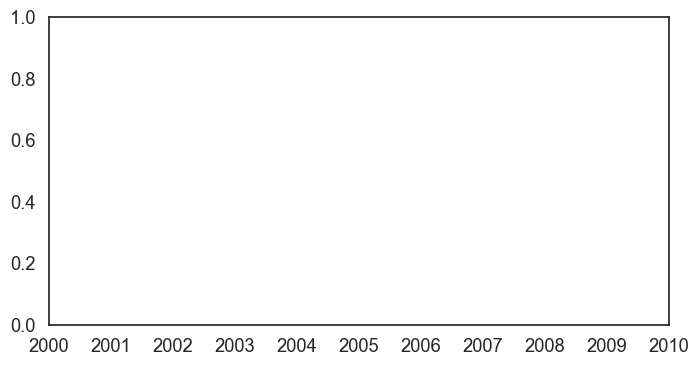

In [ ]:
fig1 = Figure_style(8, 4, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot_date(df2['heure_depart'], df2['DEPARTURE_DELAY'],
                    markeredge=False, label='initial data points')
fig1.cust_plot(test2.index, test2['mean'], linestyle='--', linewidth=2, label='mean')
fig1.cust_plot(test2.index, test2['fit'], color='r', linestyle='-', linewidth=3, label='fit')
fig1.style() ; fig1.draw_legend('upper left')
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure time', fontsize = 14)
fig1.set_ylim(-15, 210)

Here, we can see that the average delay tends to increase with the departure time of day: flights leave on time in the morning and the delay grows almost monotonously up to 30 minutes at the end of the day. In fact, this behavior is quite general and looking at other aiports or companies, we would find similar trends.

### Predicting flight delays

In [ ]:
df_train = df[df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 23)]
df_test  = df[df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 23)]
df = df_train

###  Model A: one airline, one airport

In [ ]:
carrier = 'AA'
check_airports = df[(df['AIRLINE'] == carrier)]['DEPARTURE_DELAY'].groupby(
                         df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
check_airports.sort_values('count', ascending = False, inplace = True)
check_airports[-5:]

,min,max,count,mean
ORIGIN_AIRPORT,,,,
HDN,-25.0,44.0,7.0,2.000000
GUC,-24.0,55.0,7.0,-2.142857
JAC,-19.0,36.0,7.0,-3.428571
SDF,-8.0,55.0,6.0,24.666667
MTJ,29.0,29.0,1.0,29.000000


In [ ]:
def get_flight_delays(df, carrier, id_airport, extrem_values = False):
    df2 = df[(df['AIRLINE'] == carrier) & (df['ORIGIN_AIRPORT'] == id_airport)]
    #_______________________________________
    # remove extreme values before fitting
    if extrem_values:
        df2['DEPARTURE_DELAY'] = df2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
        df2.dropna(how = 'any')
    #__________________________________
    # Conversion: date + heure -> heure
    df2.sort_values('SCHEDULED_DEPARTURE', inplace = True)
    df2['heure_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
    #___________________________________________________________________
    # regroupement des vols par heure de départ et calcul de la moyenne
    test2 = df2['DEPARTURE_DELAY'].groupby(df2['heure_depart']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    #___________________________________
    # conversion de l'heure en secondes
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    test2.reset_index(inplace=True)
    test2['heure_depart_min'] = test2['heure_depart'].apply(fct)
    return test2

In [ ]:
def linear_regression(test2):
    test = test2[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)
    X = np.array(test['heure_depart_min'])
    Y = np.array(test['mean'])
    X = X.reshape(len(X),1)
    Y = Y.reshape(len(Y),1)
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    result = regr.predict(X)
    return X, Y, result

In [ ]:
id_airport = 'PHL'
df2 = df[(df['AIRLINE'] == carrier) & (df['ORIGIN_AIRPORT'] == id_airport)]
df2['heure_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
df2['heure_depart'] = df2['heure_depart'].apply(lambda x:x.hour*3600+x.minute*60+x.second)
#___________________
# first case
test2 = get_flight_delays(df, carrier, id_airport, False)
X1, Y1, result2 = linear_regression(test2)
#___________________
# second case
test3 = get_flight_delays(df, carrier, id_airport, True)
X2, Y2, result3 = linear_regression(test3)

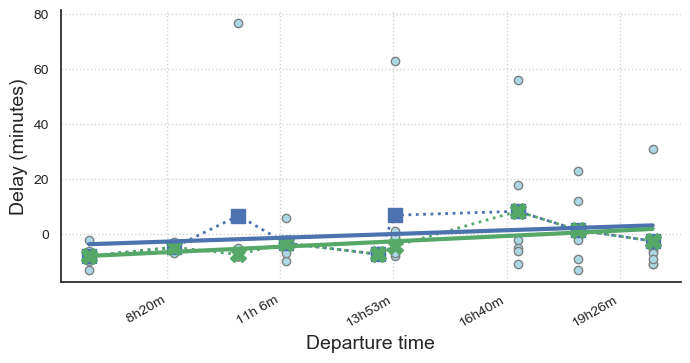

In [ ]:
fig1 = Figure_style(8, 4, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_scatter(df2['heure_depart'], df2['DEPARTURE_DELAY'], markeredge = True)
fig1.cust_plot(X1, Y1, color = 'b', linestyle = ':', linewidth = 2, marker = ('b','s', 10))
fig1.cust_plot(X2, Y2, color = 'g', linestyle = ':', linewidth = 2, marker = ('g','X', 12))
fig1.cust_plot(X1, result2, color = 'b', linewidth = 3)
fig1.cust_plot(X2, result3, color = 'g', linewidth = 3)
fig1.style()
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure time', fontsize = 14)
#____________________________________
# convert and set the x ticks labels
fct_convert = lambda x: (int(x/3600) , int(divmod(x,3600)[1]/60))
fig1.axs[fig1.ix, fig1.iy].set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*fct_convert(x))
                                            for x in fig1.axs[fig1.ix, fig1.iy].get_xticks()]);

First of all, in this figure, the points corresponding to the individual flights are represented by the points in gray. The mean of these points gives the mean delays and the mean of the set of initial points corresponds to the blue squares. By removing extreme delays (> 1h), one obtains the average delays represented by the green crosses. Thus, in the first case, the fit (solid blue curve) leads to a prediction which corresponds to an average delay of  ∼  10 minutes larger than the predicton obtained in the second case (green curve), and this, at any hour of the day.

In conclusion, we see in this example that the way in which we manage the extreme delays will have an important impact on the modeling. Note, however, that the current example corresponds to a chosen case where the impact of extreme delays is magnified by the limited number of flights. Presumably, the impact of such delays will be less pronounced in the majority of cases.

#### Polynomial degree: splitting the dataset
In practice, rather than performing a simple linear regression, we can improve the model doing a fit with a polynomial of order  𝑁 . Doing so, it is necessary to define the degree  𝑁  which is optimal to represent the data. When increasing the polynomial order, it is important * to prevent over-fitting** and we do this by splitting the dataset in test and training sets. A problem that may arise with this procedure is that the model ends by *indirectly learning the contents of the test set and is thus biased. To avoid this, the data can be re-separated into 3 sets: train, test and validation. An alternative to this technique, which is often more robust, is the so-called cross-validation method. This method consists of performing a first separation of the data in training and test sets. As always, learning is done on the training set, but to avoid over-learning, it is split into several pieces that are used alternately for training and testing.

Note that if the data set is small, the separation in test & training sets can introduce a bias in the estimation of the parameters. In practice, the cross-validation method avoids such bias. In fact, in the current model, we will encounter this type of problem and in what follows, I will highlight this. For example, we can consider an extreme case where, after separation, the training set would contain only hours  < 20h and the test set would have hours >  20h. The model would then be unable to reproduce precisely this data, of which it would not have seen equivalent during the training. The cross-validation method avoids this bias because all the data are used successively to drive the model.

** a) Bias introduced by the separation of the data set **

In order to test the impact of data separation on model determination, I first define the class * fit_polynome *:

In [ ]:
class fit_polynome:

    def __init__(self, data):
        self.data = data[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)

    def split(self, method):        
        self.method = method        
        self.X = np.array(self.data['heure_depart_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

        if method == 'all':
            self.X_train = self.X
            self.Y_train = self.Y
            self.X_test  = self.X
            self.Y_test  = self.Y                        
        elif method == 'split':            
            self.X_train, self.X_test, self.Y_train, self.Y_test = \
                train_test_split(self.X, self.Y, test_size=0.3)
    
    def train(self, pol_order):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X_train)
        self.regr.fit(self.X_, self.Y_train)
    
    def predict(self, X):
        self.X_ = self.poly.fit_transform(X)
        self.result = self.regr.predict(self.X_)
    
    def calc_score(self):        
        X_ = self.poly.fit_transform(self.X_test)
        result = self.regr.predict(X_)
        self.score = metrics.mean_squared_error(result, self.Y_test)

The * fit_polynome * class allows you to perform all operations related to a fit and to save the results. When calling the split() method, the variable 'method' defines how the initial data is separated:

*method = 'all' *: all input data is used to train and then test the model
*method = 'split' *: we use the * train_test_split() * method of sklearn to define test & training sets
Then, the other methods of the class have the following functions:

** train (n) **: drives the data on the training set and makes a polynomial of order n
** predict (X) **: calculates the Y points associated with the X input and for the previously driven model
** calc_score () **: calculates the model score in relation to the test set data
In order to illustrate the bias introduced by the selection of the test set, I proceed in the following way: I carry out several "train / test" separation of a data set and for each case, I fit polynomials of orders ** n = 1, 2 and 3 *, by calculating their respective scores. Then, I show that according to the choice of separation, the best score can be obtained with any of the values ​​of * n **. In practice, it is enough to carry out a dozen models to obtain this result. Moreover, this bias is introduced by the choice of the separation "train / test" and results from the small size of the dataset to be modeled. In fact, in the following, I take as an example the case of the airline * American Airlines * (the second biggest airline) and the airport of id 1129804, which is the airport with the most registered flights for that company. This is one of the least favorable scenarios for the emergence of this kind of bias, which, nevertheless, is present:

modèle nº1 , min. pour n = 2, score = 11.7
modèle nº2 , min. pour n = 2, score = 12.0
modèle nº3 , min. pour n = 2, score = 5.8
modèle nº4 , min. pour n = 1, score = 4.8
modèle nº5 , min. pour n = 2, score = 7.8
modèle nº6 , min. pour n = 1, score = 9.3
modèle nº7 , min. pour n = 2, score = 6.9
modèle nº8 , min. pour n = 2, score = 7.3
modèle nº9 , min. pour n = 1, score = 4.3
modèle nº10, min. pour n = 2, score = 8.1
modèle nº11, min. pour n = 1, score = 4.8
modèle nº12, min. pour n = 2, score = 1.9
modèle nº13, min. pour n = 2, score = 6.9
modèle nº14, min. pour n = 2, score = 10.0
modèle nº15, min. pour n = 1, score = 9.6
modèle nº16, min. pour n = 1, score = 6.2
modèle nº17, min. pour n = 2, score = 8.3
modèle nº18, min. pour n = 2, score = 1.8
modèle nº19, min. pour n = 2, score = 8.0
modèle nº20, min. pour n = 1, score = 21.6
modèle nº21, min. pour n = 1, score = 6.2
modèle nº22, min. pour n = 2, score = 11.5
modèle nº23, min. pour n = 2, score = 13.0
modèle nº24, min. pour n = 2

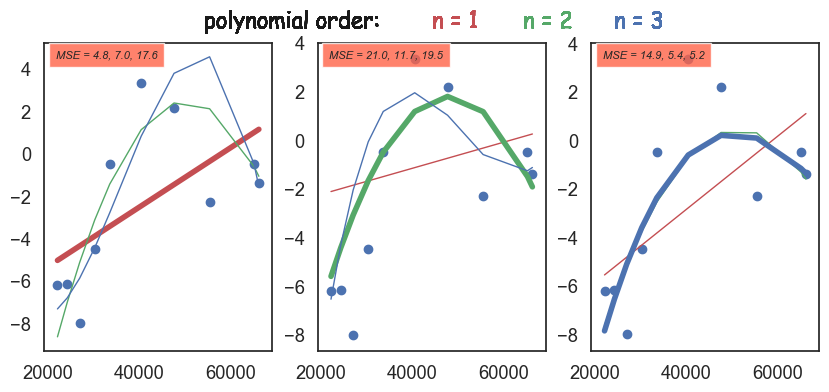

In [ ]:
fig = plt.figure(1, figsize=(10,4))

ax = ['_' for _ in range(4)]
ax[1]=fig.add_subplot(131) 
ax[2]=fig.add_subplot(132) 
ax[3]=fig.add_subplot(133) 

id_airport = 'BNA'
test2 = get_flight_delays(df, carrier, id_airport, True)

result = ['_' for _ in range(4)]
score = [10000 for _ in range(4)]
found = [False for _ in range(4)]
fit = fit_polynome(test2)

color = '.rgbyc'

inc = 0
while True:
    inc += 1
    fit.split('split')
    for i in range(1,4):
        fit.train(pol_order = i)
        fit.predict(fit.X)
        result[i] = fit.result
        fit.calc_score()
        score[i]  = fit.score

    [ind_min] = [j for j,val in enumerate(score) if min(score) == val]
    print("modèle nº{:<2}, min. pour n = {}, score = {:.1f}".format(inc, ind_min,score[ind_min]))
    
    if not found[ind_min]:            
        for i in range(1,4):
            ax[ind_min].plot(fit.X, result[i], color[i], linewidth = 4 if i == ind_min else 1)
        ax[ind_min].scatter(fit.X, fit.Y)                
        ax[ind_min].text(0.05, 0.95, 'MSE = {:.1f}, {:.1f}, {:.1f}'.format(*score[1:4]),
                         style='italic', transform=ax[ind_min].transAxes, fontsize = 8,
                         bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})                
        found[ind_min] = True

    shift = 0.5
    plt.text(-1+shift, 1.05, "polynomial order:", color = 'k',
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0+shift, 1.05, "n = 1", color = 'r', 
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0.4+shift, 1.05, "n = 2", color = 'g', 
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0.8+shift, 1.05, "n = 3", color = 'b',
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
   
    if inc == 40 or all(found[1:4]): break

In this figure, the panels from left to right correspond to 3 separations of the data in train and test sets, for which the best models are obtained respectively with polynomials of order 1, 2 and 3. On each of these panels the 3 fits polynomials have been represented and the best model corresponds to the thick curve.

** b) Selection by cross-validation**

One of the advantages of the cross-validation method is that it avoids the bias that has just been put forward when choosing the polynomial degree. In order to use this method, I define a new class that I will use later to perform the fits:

In [ ]:
class fit_polynome_cv:

    def __init__(self, data):
        self.data = data[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)
        self.X = np.array(self.data['heure_depart_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

    def train(self, pol_order, nb_folds):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X)
        self.result = cross_val_predict(self.regr, self.X_, self.Y, cv = nb_folds)
    
    def calc_score(self, pol_order, nb_folds):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X)
        self.score = np.mean(cross_val_score(self.regr, self.X_, self.Y,
                                             cv = nb_folds, scoring = 'mean_squared_error'))

This class has two methods:

** train (n, nb_folds) **: defined 'nb_folds' training sets from the initial dataset and drives a 'n' order polynomial on each of these sets. This method returns as a result the Y predictions obtained for the different test sets.
** calc_score (n, nb_folds) *: performs the same procedure as a * train ** method except that this method calculates the fit score and not the predicted values ​​on the different test data.
By default, the 'K-fold' method is used by sklearn * cross_val_predict () * and * cross_val_score () * methods. These methods are deterministic in the choice of the K folds, which implies that for a fixed K value, the results obtained using these methods will always be identical. As seen in the previous example, this was not the case when using the train_test_split() method. Thus, if we take the same dataset as in the previous example, the method of cross validation makes it possible to choose the best polynomial degree:

In [ ]:
nb_folds = 10
print('Max possible number of folds: {} \n'.format(test2.shape[0]-1))
fit2 = fit_polynome_cv(test2)
for i in range(1, 8):
    fit2.calc_score(i, nb_folds)
    print('n={} -> MSE = {}'.format(i, round(abs(fit2.score),3)))

Max possible number of folds: 9 



ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [ ]:
fit = fit_polynome(test2)
fit.split('all')
fit.train(pol_order = 2)
fit.predict(fit.X)

In [ ]:
fit2.train(pol_order = 2, nb_folds = nb_folds)

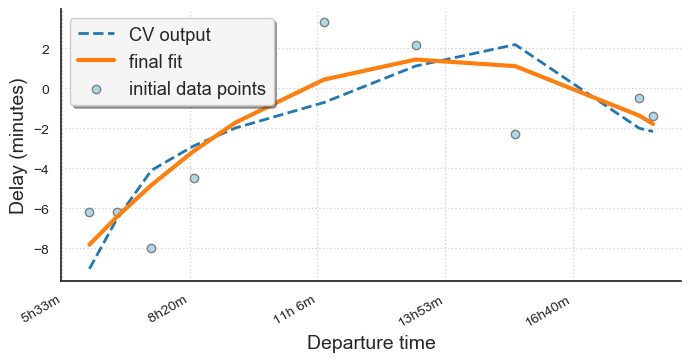

In [ ]:
fig1 = Figure_style(8, 4, 1, 1) ; fig1.pos_update(0, 0)
fig1.cust_scatter(fit2.X, fit2.Y, markeredge = True, label = 'initial data points')
fig1.cust_plot(fit.X,fit2.result,color=u'#1f77b4',linestyle='--',linewidth=2,label='CV output')
fig1.cust_plot(fit.X,fit.result,color=u'#ff7f0e',linewidth = 3,label='final fit')
fig1.style(); fig1.draw_legend('upper left')
fig1.set_ylabel('Delay (minutes)') ; fig1.set_xlabel('Departure time')
#____________________________________
# convert and set the x ticks labels
fct_convert = lambda x: (int(x/3600) , int(divmod(x,3600)[1]/60))
fig1.axs[fig1.ix, fig1.iy].set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*fct_convert(x))
                                            for x in fig1.axs[fig1.ix, fig1.iy].get_xticks()]);

In [ ]:
score = metrics.mean_squared_error(fit.result, fit2.Y)
score

3.734492050908519

##### Model test: prediction of end-January delays¶
At this stage, the model was driven is tested on the training set which include the data of the first 3 weeks of January. We now look at the comparison of predictions and observations for the fourth week of January:

In [ ]:
test_data = get_flight_delays(df_test, carrier, id_airport, True)
test_data = test_data[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)
X_test = np.array(test_data['heure_depart_min'])
Y_test = np.array(test_data['mean'])
X_test = X_test.reshape(len(X_test),1)
Y_test = Y_test.reshape(len(Y_test),1)
fit.predict(X_test)

In [ ]:
score = metrics.mean_squared_error(fit.result, Y_test)
score

11.811150931332532

In [ ]:
'Ecart = {:.2f} min'.format(np.sqrt(score))

'Ecart = 3.44 min'

### Model B: One airline, all airports

In [ ]:
def get_merged_delays(df, carrier):
    liste_airports = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    i = 0
    liste_columns = ['AIRPORT_ID', 'heure_depart_min', 'mean']
    for id_airport in liste_airports:
        test2 = get_flight_delays(df, carrier, id_airport, True)
        test2.loc[:, 'AIRPORT_ID'] = id_airport
        test2 = test2[liste_columns]
        test2.dropna(how = 'any', inplace = True)
        if i == 0:
            merged_df = test2.copy()
        else:
            merged_df = pd.concat([merged_df, test2], ignore_index = True)
        i += 1    
    return merged_df

In [ ]:
carrier = 'AA'
merged_df = get_merged_delays(df, carrier)
merged_df.shape

(1170, 3)

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(merged_df['AIRPORT_ID'])
#__________________________________________________________
# correspondance between the codes and tags of the airports
zipped = zip(integer_encoded, merged_df['AIRPORT_ID'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])
label_airports[:5]

[(0, 'ABQ'), (1, 'ATL'), (2, 'AUS'), (3, 'BDL'), (4, 'BHM')]

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
b = np.array(merged_df['heure_depart_min'])
b = b.reshape(len(b),1)
X = np.hstack((onehot_encoded, b))
Y = np.array(merged_df['mean'])
Y = Y.reshape(len(Y), 1)
print(X.shape, Y.shape)

(1170, 81) (1170, 1)


#### Linear Regression

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
print("MSE =", metrics.mean_squared_error(predictions, Y))

MSE = 23.33768861171535


Here, I calculated the MSE score of the fit. In practice, we can have a feeling of the quality of the fit by considering the number of predictions where the differences with real values is greater than 15 minutes:

In [ ]:
icount = 0
for i, val in enumerate(Y):
    if abs(val-predictions[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(predictions) * 100)

'1.20%'

AttributeError: module 'seaborn' has no attribute 'plt'

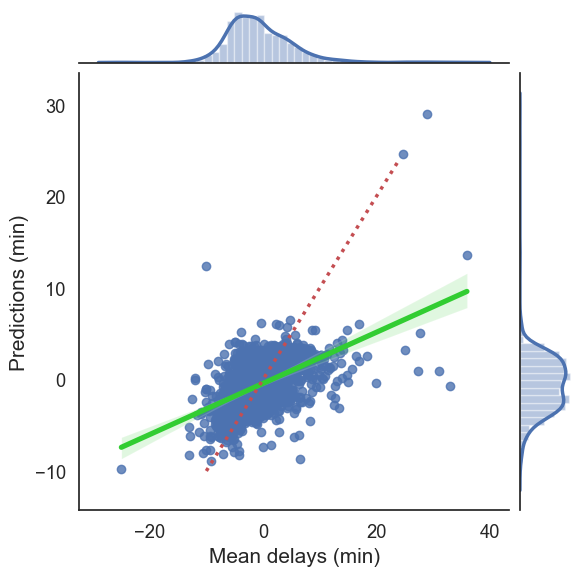

In [ ]:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in predictions]) 
tips["original_data"] = pd.Series([float(s) for s in Y]) 
sns.jointplot(x="original_data", y="prediction", data=tips, size = 6, ratio = 7,
              joint_kws={'line_kws':{'color':'limegreen'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.plot(list(range(-10,25)), list(range(-10,25)), linestyle = ':', color = 'r')
sns.plt.show()

#### Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree = 2)
regr = linear_model.LinearRegression()
X_ = poly.fit_transform(X)
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
result = regr.predict(X_)
print("MSE =", metrics.mean_squared_error(result, Y))

MSE = 19.96729102711979


In [ ]:
icount = 0
for i, val in enumerate(Y):
    if abs(val-result[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(result) * 100)

'0.60%'

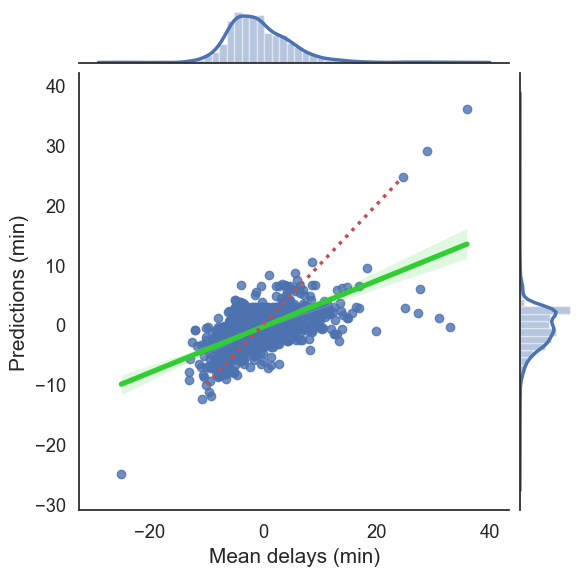

In [ ]:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in result]) 
tips["original_data"] = pd.Series([float(s) for s in Y]) 
sns.jointplot(x="original_data", y="prediction", data=tips, size = 6, ratio = 7,
              joint_kws={'line_kws':{'color':'limegreen'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.plot(list(range(-10,25)), list(range(-10,25)), linestyle = ':', color = 'r')
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_train.shape

(819, 81)

In [ ]:
poly = PolynomialFeatures(degree = 2)
regr = linear_model.LinearRegression()
X_ = poly.fit_transform(X_train)
regr.fit(X_, Y_train)
result = regr.predict(X_)
score = metrics.mean_squared_error(result, Y_train)
print("Mean squared error = ", score)

Mean squared error =  18.556484713486334


In [ ]:
somme = 0
for valeurs in zip(result, Y_test):
    ajout = (float(valeurs[0]) - float(valeurs[1]))**2
    somme += ajout
    if ajout > 10**4:
        print("{:<.1f} {:<.1f} {:<.1f}".format(ajout, float(valeurs[0]), float(valeurs[1])))

In [ ]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.3,normalize=True)
poly = PolynomialFeatures(degree = 2)
X_ = poly.fit_transform(X_train)
ridgereg.fit(X_, Y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
print("Mean squared error = ", score)

Mean squared error =  32.469855554483985


In [ ]:
score_min = 10000
for pol_order in range(1, 3):
    for alpha in range(0, 20, 2):
        ridgereg = Ridge(alpha = alpha/10, normalize=True)
        poly = PolynomialFeatures(degree = pol_order)
        regr = linear_model.LinearRegression()
        X_ = poly.fit_transform(X_train)
        ridgereg.fit(X_, Y_train)        
        X_ = poly.fit_transform(X_test)
        result = ridgereg.predict(X_)
        score = metrics.mean_squared_error(result, Y_test)        
        if score < score_min:
            score_min = score
            parameters = [alpha/10, pol_order]
        print("n={} alpha={} , MSE = {:<0.5}".format(pol_order, alpha, score))

n=1 alpha=0 , MSE = 32.971
n=1 alpha=2 , MSE = 32.281
n=1 alpha=4 , MSE = 32.066
n=1 alpha=6 , MSE = 32.065
n=1 alpha=8 , MSE = 32.162
n=1 alpha=10 , MSE = 32.304
n=1 alpha=12 , MSE = 32.464
n=1 alpha=14 , MSE = 32.628
n=1 alpha=16 , MSE = 32.789
n=1 alpha=18 , MSE = 32.944
n=2 alpha=0 , MSE = 40.446
n=2 alpha=2 , MSE = 32.552
n=2 alpha=4 , MSE = 32.404
n=2 alpha=6 , MSE = 32.307
n=2 alpha=8 , MSE = 32.246
n=2 alpha=10 , MSE = 32.214
n=2 alpha=12 , MSE = 32.204
n=2 alpha=14 , MSE = 32.211
n=2 alpha=16 , MSE = 32.233
n=2 alpha=18 , MSE = 32.264


In [ ]:
ridgereg = Ridge(alpha = parameters[0], normalize=True)
poly = PolynomialFeatures(degree = parameters[1])
X_ = poly.fit_transform(X)
ridgereg.fit(X_, Y)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y)        
print(score)

24.486711055526897


In [ ]:
carrier = 'AA'
merged_df_test = get_merged_delays(df_test, carrier)

In [ ]:
label_conversion = dict()
for s in label_airports:
    label_conversion[s[1]] = s[0]

merged_df_test['AIRPORT_ID'].replace(label_conversion, inplace = True)

for index, label in label_airports:
    temp = merged_df_test['AIRPORT_ID'] == index
    temp = temp.apply(lambda x:1.0 if x else 0.0)
    if index == 0:
        matrix = np.array(temp)
    else:
        matrix = np.vstack((matrix, temp))
matrix = matrix.T

b = np.array(merged_df_test['heure_depart_min'])
b = b.reshape(len(b),1)
X_test = np.hstack((matrix, b))
Y_test = np.array(merged_df_test['mean'])
Y_test = Y_test.reshape(len(Y_test), 1)

In [ ]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
'MSE = {:.2f}'.format(score)

'MSE = 28.08'

In [ ]:
'Ecart = {:.2f} min'.format(np.sqrt(score))

'Ecart = 5.30 min'

# Cancellation Analysis

For this analysis we are using only load only specific columns sincs we thought the other columns are not necessary for what we want to accomplish.

In [ ]:
# total number of datapoints = 5819078 

n = 5819078
#skip = sorted(random.sample(range(1,n),n-2000))
skip = random.sample(range(1,n),n-20000)
flights = pd.read_csv('flights.csv',skiprows=skip,usecols = ['MONTH','DAY','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE',
                                                             'DEPARTURE_DELAY','ARRIVAL_DELAY','CANCELLED'],low_memory=False)
airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')
flights = flights.sample(frac=1).reset_index(drop=True) 
all_features = flights.columns.values

In [ ]:
Depart_airport = str(input("Specify the departure airport (three letters) or put ALL:  ")).upper()
if Depart_airport in list(flights['ORIGIN_AIRPORT']):
    flights = flights[flights['ORIGIN_AIRPORT']== Depart_airport]
elif Depart_airport == 'ALL':
    print('Analyzing all airports')
else:        
    print("incorrect airport code")

Specify the departure airport (three letters) or put ALL:  All
Analyzing all airports


Creating a column describing whether the flight was late to arrivelate or got cancelled

In [ ]:
def late_or_cancelled(x):
#    if x['ARRIVAL_DELAY'] > 60:
    if x['CANCELLED'] == 1 or x['ARRIVAL_DELAY'] > 60:
        return 1
    else:
        return 0

flights['late or cancelled'] = flights.apply(late_or_cancelled,axis = 1)
flights = flights[flights['CANCELLED']==0]
#predictions = flights.apply(late_or_cancelled,axis = 1)

In [ ]:
days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
def day_31_to_365(x):
    days_365 = days_in_month[:x['MONTH']-1].sum() + x['DAY']
    return days_365

In [ ]:
flights['DAY'] = flights.apply(day_31_to_365,axis = 1)
flights['WEEK'] = flights['DAY']//7
del flights['DAY']

In [ ]:
flights['SCHEDULED_DEPARTURE'] = np.ceil(flights['SCHEDULED_DEPARTURE']/600).apply(int)

Removing the data we dont need for this analysis

In [ ]:
del flights['ARRIVAL_DELAY']
del flights['DEPARTURE_DELAY']
del flights['CANCELLED']

##### Plotting being late or not vs different features

In [ ]:
Delay_vs_Day_of_Week = pd.DataFrame({'delays' : flights.groupby(['DAY_OF_WEEK'])['late or cancelled'].mean()}).reset_index()
Delay_vs_WEEK = pd.DataFrame({'delays' : flights.groupby(['WEEK'])['late or cancelled'].mean()}).reset_index()
Delay_vs_AIRLINE = pd.DataFrame({'delays' : flights.groupby(['AIRLINE'])['late or cancelled'].mean()})#.reset_index()
Delay_vs_SCHEDULED_DEPARTURE = pd.DataFrame({'delays' : flights.groupby(['SCHEDULED_DEPARTURE'])['late or cancelled'].mean()}).reset_index()

#Delay_vs_Day_of_Week.plot(x='DAY_OF_WEEK', y='delays')
#Delay_vs_Day_of_Week['delays'].hist(hold=None)

[Text(0, 0, '00:00 - 06:00'),
 Text(0, 0, '06:00 - 12:00'),
 Text(0, 0, '12:00 - 18:00'),
 Text(0, 0, '18:00 - 00:00')]

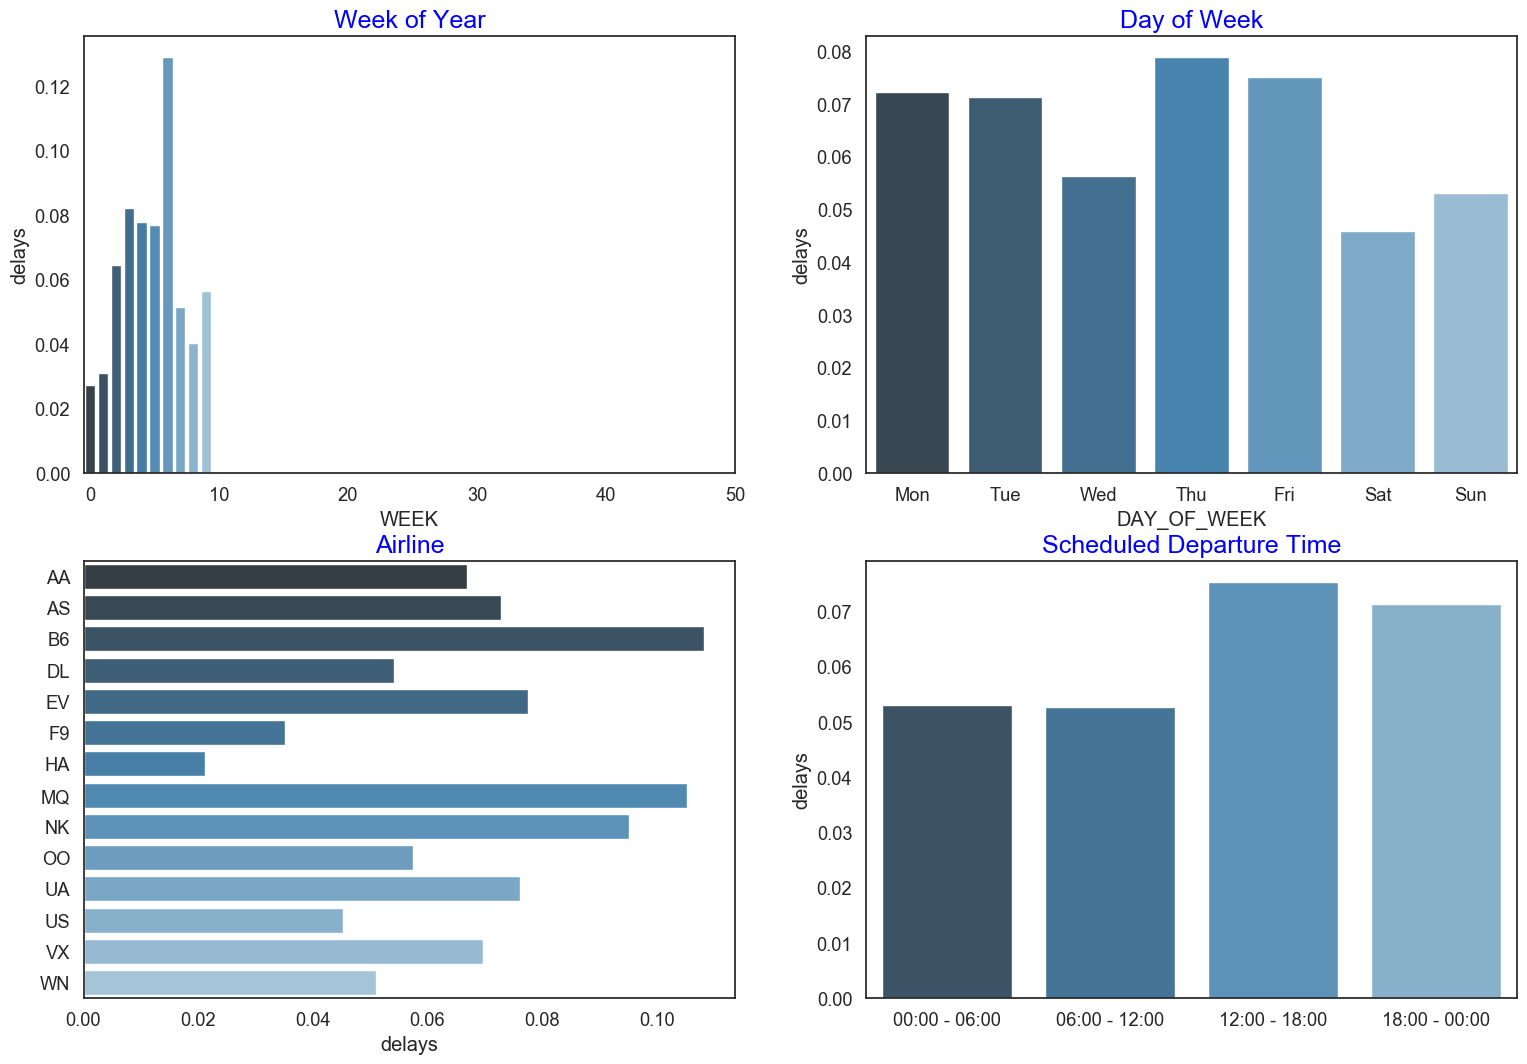

In [ ]:
fig = plt.figure(figsize=(18.5, 12.5))

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Week of Year', fontsize=18, color="blue")
sns.barplot(x="WEEK", y="delays", data=Delay_vs_WEEK, palette="Blues_d", ax = sub1)
sub1.set_xticks(list(range(0,52,10)))
sub1.set_xticklabels(list(range(0,52,10)))

sub2 = fig.add_subplot(222)
sub2.set_title('Day of Week', fontsize=18, color="blue")
sns.barplot(x="DAY_OF_WEEK", y="delays", data=Delay_vs_Day_of_Week, palette="Blues_d", ax = sub2)
sub2.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

sub3 = fig.add_subplot(223)
sub3.set_title('Airline', fontsize=18, color="blue")
sns.barplot(y = list(range(len(Delay_vs_AIRLINE))), x=Delay_vs_AIRLINE['delays'], palette="Blues_d", ax = sub3, orient="h")
sub3.set_yticks(range(len(Delay_vs_AIRLINE)))
sub3.set_yticklabels(Delay_vs_AIRLINE.index)

sub4 = fig.add_subplot(224)
sns.barplot(x = list(range(len(Delay_vs_SCHEDULED_DEPARTURE))), y=Delay_vs_SCHEDULED_DEPARTURE['delays'], palette="Blues_d", ax = sub4)
sub4.set_title('Scheduled Departure Time', fontsize=18, color="blue")
sub4.set_xticks([0, 1, 2, 3])
sub4.set_xticklabels(['00:00 - 06:00','06:00 - 12:00','12:00 - 18:00','18:00 - 00:00'])

##### Correcting for a bias in being late vs not being late

In [ ]:
num_late = sum(flights['late or cancelled'])

flights_on_time = flights[flights['late or cancelled']==0]

flights_orig = flights.copy()

flights_on_time = flights_on_time.sample(frac=num_late/flights.shape[0]).reset_index(drop=True)
flights_on_time.shape
flights = pd.concat([flights[flights['late or cancelled']==1],flights_on_time])
flights = flights.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

WEEK_LabBin = LabelBinarizer()
WEEK_LabBin.fit(flights_orig['WEEK'])
WEEK_binarized = np.array(WEEK_LabBin.transform(flights['WEEK']))
WEEK_binarized_orig = np.array(WEEK_LabBin.transform(flights_orig['WEEK']))


DAY_OF_WEEK_LabBin = LabelBinarizer()
DAY_OF_WEEK_LabBin.fit(flights_orig['DAY_OF_WEEK'])
DAY_OF_WEEK_binarized = np.array(DAY_OF_WEEK_LabBin.transform(flights['DAY_OF_WEEK']))
DAY_OF_WEEK_binarized_orig = np.array(DAY_OF_WEEK_LabBin.transform(flights_orig['DAY_OF_WEEK']))


AIRLINE_LabBin = LabelBinarizer()
AIRLINE_LabBin.fit(flights_orig['AIRLINE'])
AIRLINE_binarized = np.array(AIRLINE_LabBin.transform(flights['AIRLINE']))
AIRLINE_binarized_orig = np.array(AIRLINE_LabBin.transform(flights_orig['AIRLINE']))


ORIGIN_AIRPORT_LabBin = LabelBinarizer()
ORIGIN_AIRPORT_LabBin.fit(flights_orig['ORIGIN_AIRPORT'])
ORIGIN_AIRPORT_binarized = np.array(DAY_OF_WEEK_LabBin.transform(flights['ORIGIN_AIRPORT']))
ORIGIN_AIRPORT_binarized_orig = np.array(DAY_OF_WEEK_LabBin.transform(flights_orig['ORIGIN_AIRPORT']))


DESTINATION_AIRPORT_LabBin = LabelBinarizer()
DESTINATION_AIRPORT_LabBin.fit(flights_orig['DESTINATION_AIRPORT'])
DESTINATION_AIRPORT_binarized = np.array(DESTINATION_AIRPORT_LabBin.transform(flights['DESTINATION_AIRPORT']))
DESTINATION_AIRPORT_binarized_orig = np.array(DESTINATION_AIRPORT_LabBin.transform(flights_orig['DESTINATION_AIRPORT']))


SCHEDULED_DEPARTURE_LabBin = LabelBinarizer()
SCHEDULED_DEPARTURE_LabBin.fit(flights_orig['SCHEDULED_DEPARTURE'])
SCHEDULED_DEPARTURE_binarized = np.array(SCHEDULED_DEPARTURE_LabBin.transform(flights['SCHEDULED_DEPARTURE']))
SCHEDULED_DEPARTURE_binarized_orig = np.array(SCHEDULED_DEPARTURE_LabBin.transform(flights_orig['SCHEDULED_DEPARTURE']))


# flights_binarized will contain all data in sparce matrix form
flights_binarized = np.concatenate((WEEK_binarized,DAY_OF_WEEK_binarized,AIRLINE_binarized,ORIGIN_AIRPORT_binarized,
                                    DESTINATION_AIRPORT_binarized,SCHEDULED_DEPARTURE_binarized),axis=1)
flights_binarized_orig = np.concatenate((WEEK_binarized_orig,DAY_OF_WEEK_binarized_orig,AIRLINE_binarized_orig,ORIGIN_AIRPORT_binarized_orig,
                                    DESTINATION_AIRPORT_binarized_orig,SCHEDULED_DEPARTURE_binarized_orig),axis=1)

print(flights_binarized.shape)
print(flights_binarized_orig.shape)

(437, 270)
(3475, 270)


In [ ]:
# splitting data into test and training sets
from sklearn.model_selection import train_test_split

train_set, test_set, train_set_target, test_set_target = train_test_split(flights_binarized, flights['late or cancelled'], test_size = 0.4, random_state=42)

### Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_jobs=-1)
forest_reg.fit(train_set,train_set_target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
confusion_matrix(train_set_target,(forest_reg.predict(train_set)).round())

array([[124,   1],
       [  0, 137]], dtype=int64)

In [ ]:
confusion_matrix(test_set_target,(forest_reg.predict(test_set)).round())

array([[40, 46],
       [32, 57]], dtype=int64)

#### Using Girdsreach for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [75, 100],'max_features':[10, 20],'max_depth':[20, 30]}]
forest_reg = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_set,train_set_target)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

Confusion matrix for training set

In [ ]:
# confusion matrix for training set
confusion_matrix(train_set_target,(grid_search.predict(train_set)).round())

array([[124,   1],
       [  0, 137]], dtype=int64)

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Confusion matrix for test set

In [ ]:
# confusion matrix for test set
confusion_matrix(test_set_target,(grid_search.predict(test_set)).round())

array([[40, 46],
       [37, 52]], dtype=int64)

Creating column "Comparison" to show which results is true/false pos/neg¶
True pos = 1, True neg = 2, False pos = 3, false neg = 4

In [ ]:
def comparison_col(x):
    # True pos = 1, True neg = 2, False pos = 3, false neg = 4
    if (x['True'] == 1) & (x['predict'] > 0.5):
        return 1
    elif (x['True'] == 0) & (x['predict'] < 0.5):
        return 2
    elif (x['True'] == 0) & (x['predict'] > 0.5):
        return 3
    elif (x['True'] == 1) & (x['predict'] < 0.5):
        return 4

In [ ]:
predictions = grid_search.predict(train_set)
grid_reg_results = pd.DataFrame({'True':train_set_target, 'predict':predictions})

grid_reg_results['Comparison'] = grid_reg_results.apply(comparison_col, axis = 1)

(0, 1)

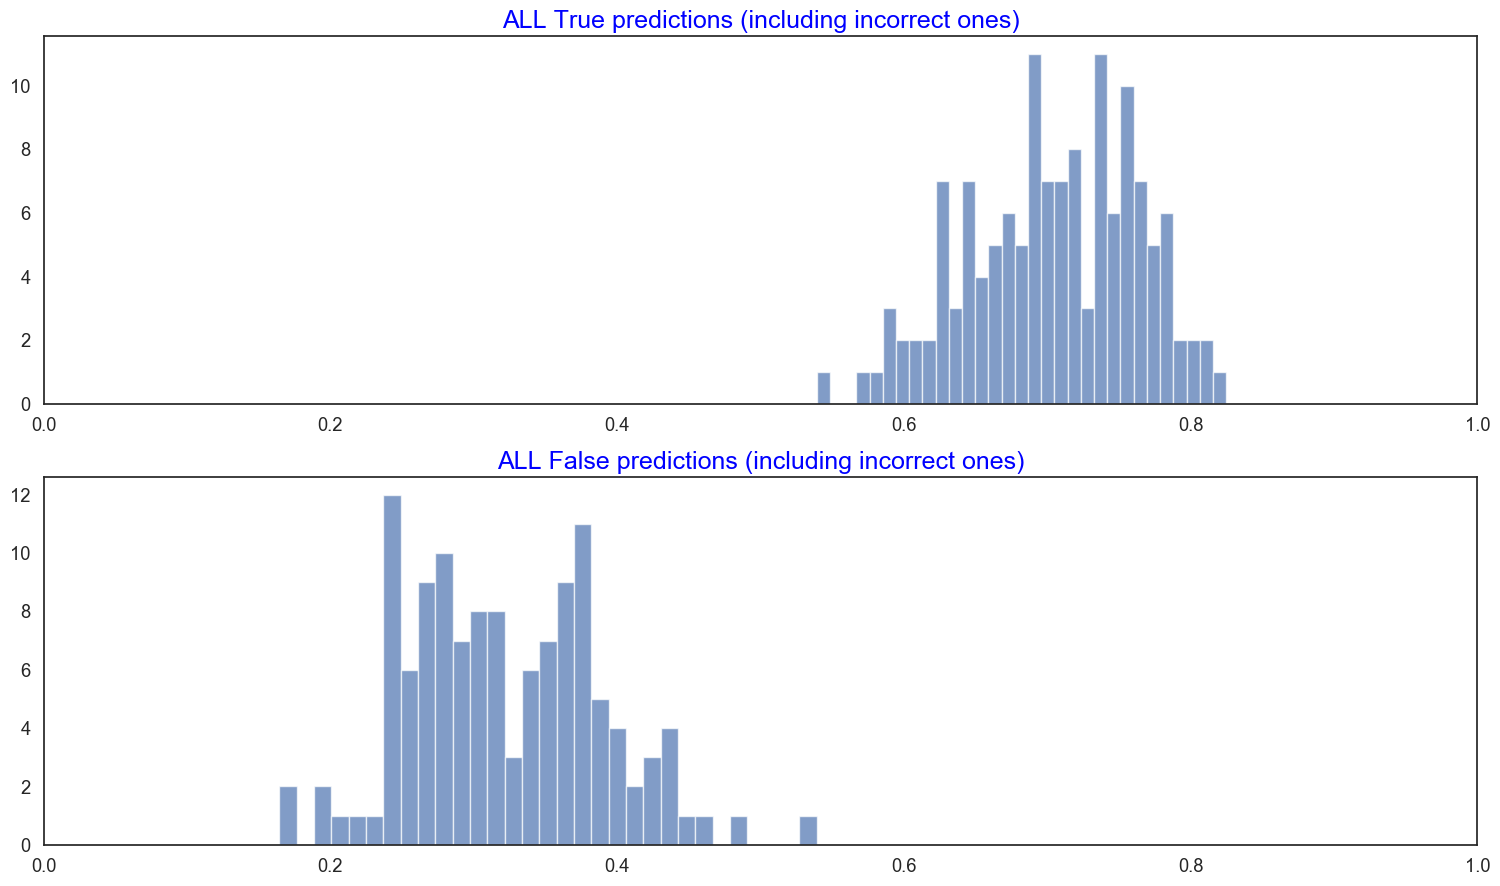

In [ ]:
fig = plt.figure(figsize=(18.5, 10.5))
sub1 = fig.add_subplot(211) # instead of plt.subplot(2, 2, 1)
sub1.set_title('ALL True predictions (including incorrect ones)', fontsize=18, color="blue")
sub1.hist(grid_reg_results[grid_reg_results['True']==1]['predict'],alpha=0.7, bins=31)
sub1.set_xlim([0, 1])

sub2 = fig.add_subplot(212)
sub2.set_title('ALL False predictions (including incorrect ones)', fontsize=18, color="blue")
sub2.hist(grid_reg_results[grid_reg_results['True']==0]['predict'],alpha=0.7, bins=31)
sub2.set_xlim([0, 1])

Histograms for the analysis

Text(0.5, 1.0, 'Training Data')

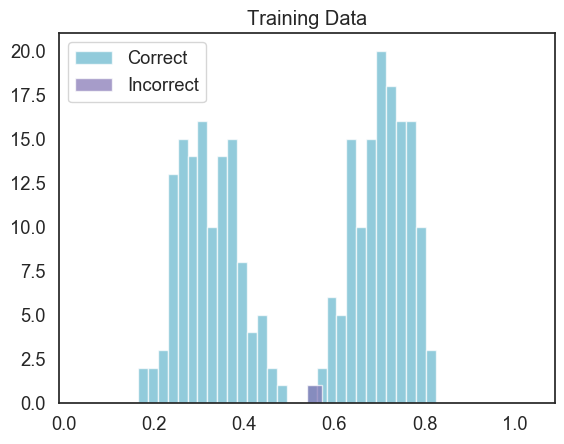

In [ ]:
plt.hist(grid_reg_results[grid_reg_results['Comparison'].isin([1,2])]['predict'],alpha=0.7, bins=30,label='Correct',color='c')
plt.hist(grid_reg_results[grid_reg_results['Comparison'].isin([3,4])]['predict'],alpha=0.7, bins=30,label='Incorrect',color='m')
plt.legend(loc='upper left')
plt.title('Training Data')

In [ ]:
test_predictions = grid_search.predict(test_set)
test_grid_reg_results = pd.DataFrame({'True':test_set_target, 'predict':test_predictions})
test_grid_reg_results['Comparison'] = test_grid_reg_results.apply(comparison_col, axis = 1)

Text(0.5, 1.0, 'Test Data')

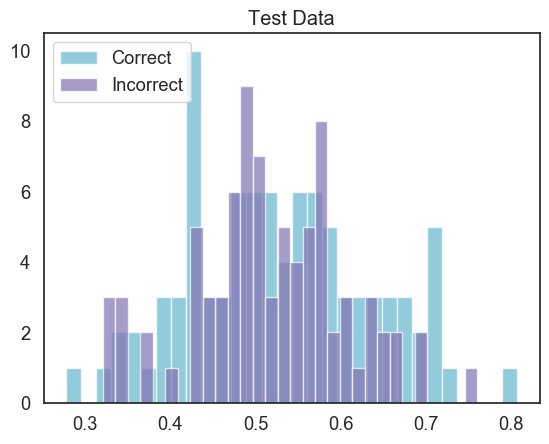

In [ ]:
plt.hist(test_grid_reg_results[test_grid_reg_results['Comparison'].isin([1,2])]['predict'],alpha=0.7, bins=30,label='Correct',color='c')
plt.hist(test_grid_reg_results[test_grid_reg_results['Comparison'].isin([3,4])]['predict'],alpha=0.7, bins=30,label='Incorrect',color='m')
plt.legend(loc='upper left')
plt.title('Test Data')

Text(0.5, 1.0, 'ROC Curve for Test Data')

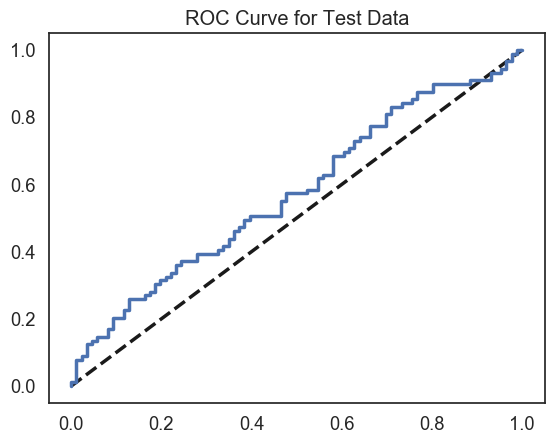

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, _ = roc_curve(test_set_target, test_predictions)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.title('ROC Curve for Test Data')

Now we will modify original flights data before balancing late vs. not_late

In [ ]:
orig_predictions = grid_search.predict(flights_binarized_orig)
orig_target = flights_orig['late or cancelled']
orig_grid_reg_results = pd.DataFrame({'True':orig_target, 'predict':orig_predictions})
orig_grid_reg_results['Comparison'] = orig_grid_reg_results.apply(comparison_col, axis = 1)

(0, 200)

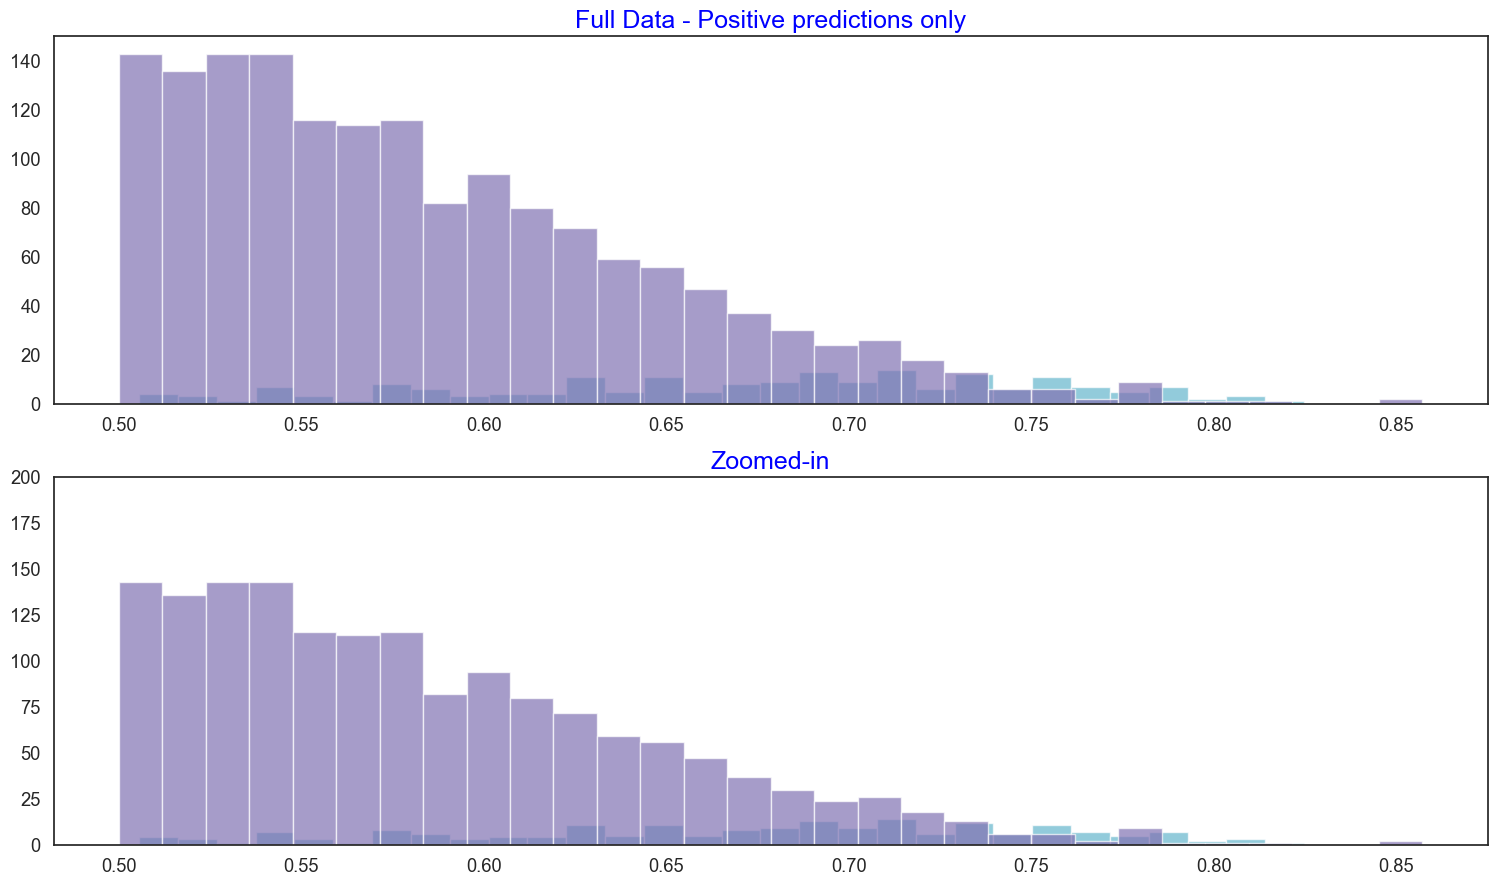

In [ ]:
fig = plt.figure(figsize=(18.5, 10.5))
sub1 = fig.add_subplot(211) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Full Data - Positive predictions only', fontsize=18, color="blue")
sub1.hist(orig_grid_reg_results[orig_grid_reg_results['Comparison'].isin([1])]['predict'],alpha=0.7, bins=30,label='True Positive',color='c')
sub1.hist(orig_grid_reg_results[orig_grid_reg_results['Comparison'].isin([3])]['predict'],alpha=0.7, bins=30,label='False Positive',color='m')
#sub1.set_xlim([0, 1])

sub2 = fig.add_subplot(212)
sub2.set_title('Zoomed-in', fontsize=18, color="blue")
sub2.hist(orig_grid_reg_results[orig_grid_reg_results['Comparison'].isin([1])]['predict'],alpha=0.7, bins=30,label='True Positive',color='c')
sub2.hist(orig_grid_reg_results[orig_grid_reg_results['Comparison'].isin([3])]['predict'],alpha=0.7, bins=30,label='False Positive',color='m')
sub2.set_ylim([0, 200])
#sub1.set_xlim([0, 1])

In [ ]:
confusion_matrix(orig_target,(orig_predictions).round())

array([[1672, 1577],
       [  37,  189]], dtype=int64)

Text(0.5, 1.0, 'ROC Curve for Full Data')

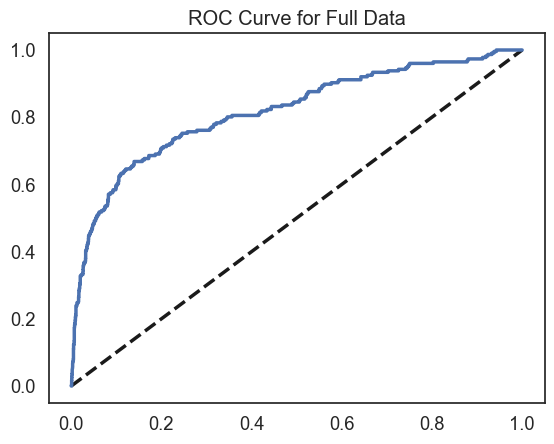

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, _ = roc_curve(orig_target, orig_predictions)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.title('ROC Curve for Full Data')